In [235]:
# !mkdir -p ~/.kaggle
# !mv kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

# !kaggle competitions download -c russian-car-plates-prices-prediction

# !unzip russian-car-plates-prices-prediction.zip

In [236]:
from supplemental_english import *
import pandas as pd

# KAGGLE
df = pd.read_csv('/kaggle/input/russian-car-plates-prices-prediction/train.csv')
test_df = pd.read_csv('/kaggle/input/russian-car-plates-prices-prediction/test.csv', usecols=['id', 'plate', 'date'])
sample_submission_df = pd.read_csv('/kaggle/input/russian-car-plates-prices-prediction/sample_submission.csv', usecols=['id'])

# # COLAB
# df = pd.read_csv('/content/train.csv')
# test_df = pd.read_csv('/content/test.csv', usecols=['id', 'plate', 'date'])
# sample_submission_df = pd.read_csv('/content/sample_submission.csv', usecols=['id'])

In [237]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [238]:
print(df.shape)
df.sample(3)

(51635, 4)


,id,plate,date,price
17215,17216,T191PE777,2024-10-30 00:00:00,200000
42219,42220,P071TA797,2024-12-12 00:00:00,55000
38016,38017,M430MM150,2024-03-20 00:00:00,1000000


In [239]:
print(test_df.shape)
test_df.sample(3)

(7695, 3)


,id,plate,date
115,51751,P080BE797,2024-10-21 00:00:00
7527,59163,E787TH797,2024-11-22 00:00:00
3863,55499,B005YX197,2024-07-17 00:00:00


In [240]:
print(sample_submission_df.shape)
sample_submission_df.sample(3)

(7695, 1)


,id
6746,58382
1743,53379
3099,54735


# **Feature Engineering**

## **Add *serial*, *serial_letter_1*, *serial_letter_2*, *serial_letter_3*, *registration_code*, *registration_code_number_1*, *registration_code_number_2*, *registration_code_number_3*, *region_code*, *region_name*, *mean_ascii_embedding*, and *std_ascii_embedding* column**

In [241]:
def get_serial(plate):
    serial = ''.join([char for char in plate if char.isalpha()])
    return serial

In [242]:
def get_registration_code(plate):
    registration_code = ''.join(filter(str.isdigit, plate[1:4]))  # Ambil 3 karakter terakhir dan merupakan angka
    return registration_code

In [243]:
def get_region_code(plate):
    region_code = ''.join(filter(str.isdigit, plate[-3:]))  # Ambil 3 karakter terakhir dan merupakan angka
    return region_code

In [244]:
def get_region_name(region_code):
    for region_name, codes in REGION_CODES.items():
        if region_code in codes:
            return region_name
    return 'Unknown'  # Jika tidak ditemukan

In [245]:
df['serial'] = df['plate'].apply(get_serial)

df['serial_letter_1'] = df['serial'].str[0]
df['serial_letter_2'] = df['serial'].str[1]
df['serial_letter_3'] = df['serial'].str[2]

df['registration_code'] = df['plate'].apply(get_registration_code)

df['registration_code_number_1'] = df['registration_code'].str[0]
df['registration_code_number_2'] = df['registration_code'].str[1]
df['registration_code_number_3'] = df['registration_code'].str[2]

df['ascii_embedding'] = df.apply(
    lambda row: [
        int(ord(row['serial_letter_1'])),
        int(ord(row['serial_letter_2'])),
        int(ord(row['serial_letter_3'])),
        int(ord(row['registration_code_number_1'])),
        int(ord(row['registration_code_number_2'])),
        int(ord(row['registration_code_number_3'])),
        ],
    axis=1)

df['region_code'] = df['plate'].apply(get_region_code)
df['region_name'] = df['region_code'].apply(get_region_name)

test_df['serial'] = test_df['plate'].apply(get_serial)

test_df['serial_letter_1'] = test_df['serial'].str[0]
test_df['serial_letter_2'] = test_df['serial'].str[1]
test_df['serial_letter_3'] = test_df['serial'].str[2]

test_df['registration_code'] = test_df['plate'].apply(get_registration_code)

test_df['registration_code_number_1'] = test_df['registration_code'].str[0]
test_df['registration_code_number_2'] = test_df['registration_code'].str[1]
test_df['registration_code_number_3'] = test_df['registration_code'].str[2]

test_df['ascii_embedding'] = test_df.apply(
    lambda row: [
        int(ord(row['serial_letter_1'])),
        int(ord(row['serial_letter_2'])),
        int(ord(row['serial_letter_3'])),
        int(ord(row['registration_code_number_1'])),
        int(ord(row['registration_code_number_2'])),
        int(ord(row['registration_code_number_3'])),
        ],
    axis=1)

test_df['region_code'] = test_df['plate'].apply(get_region_code)
test_df['region_name'] = test_df['region_code'].apply(get_region_name)

In [246]:
df['registration_code'] = df['registration_code'].astype('int64')

df['registration_code_number_1'] = df['registration_code_number_1'].astype('int64')
df['registration_code_number_2'] = df['registration_code_number_2'].astype('int64')
df['registration_code_number_3'] = df['registration_code_number_3'].astype('int64')

test_df['registration_code'] = test_df['registration_code'].astype('int64')

test_df['registration_code_number_1'] = test_df['registration_code_number_1'].astype('int64')
test_df['registration_code_number_2'] = test_df['registration_code_number_2'].astype('int64')
test_df['registration_code_number_3'] = test_df['registration_code_number_3'].astype('int64')

In [247]:
import numpy as np

df['mean_ascii_embedding'] = df['ascii_embedding'].apply(lambda x: np.mean(x))
df['std_ascii_embedding'] = df['ascii_embedding'].apply(lambda x: np.std(x))

test_df['mean_ascii_embedding'] = test_df['ascii_embedding'].apply(lambda x: np.mean(x))
test_df['std_ascii_embedding'] = test_df['ascii_embedding'].apply(lambda x: np.std(x))

df = df.drop(['ascii_embedding'], axis=1)
test_df = test_df.drop(['ascii_embedding'], axis=1)

In [248]:
df.sample(3)

,id,plate,date,price,serial,serial_letter_1,serial_letter_2,serial_letter_3,registration_code,registration_code_number_1,registration_code_number_2,registration_code_number_3,region_code,region_name,mean_ascii_embedding,std_ascii_embedding
16077,16078,H969HY777,2024-04-11 00:00:00,50000,HHY,H,H,Y,969,9,6,9,777,Moscow,66.833333,12.266712
23273,23274,A896HH797,2023-02-08 22:00:32,30000,AHH,A,H,H,896,8,9,6,797,Moscow,62.666667,7.431166
42692,42693,Y191OM77,2024-11-22 00:00:00,270000,YOM,Y,O,M,191,1,9,1,77,Moscow,66.666667,15.680845


In [249]:
test_df.sample(3)

,id,plate,date,serial,serial_letter_1,serial_letter_2,serial_letter_3,registration_code,registration_code_number_1,registration_code_number_2,registration_code_number_3,region_code,region_name,mean_ascii_embedding,std_ascii_embedding
5054,56690,X141EO76,2024-10-22 00:00:00,XEO,X,E,O,141,1,4,1,76,Yaroslavl Oblast,64.333333,15.380363
3004,54640,E047PH797,2024-07-18 00:00:00,EPH,E,P,H,47,0,4,7,797,Moscow,62.666667,11.657139
1132,52768,E319BA550,2025-02-10 00:00:00,EBA,E,B,A,319,3,1,9,550,Moscow Oblast,59.500000,7.653975


## **Add *region_type* column**

In [250]:
def get_region_type(region_name):
    if 'Republic' in region_name:
        return 'Republic'
    elif 'Krai' in region_name:
        return 'Krai'
    elif 'Oblast' in region_name:
        return 'Oblast'
    elif 'Autonomous' in region_name:
        return 'Autonomous'
    elif 'Autonomous Oblast' in region_name:
        return 'Autonomous Oblast'
    elif region_name in ['Baikonur']:
        return 'Special Administrative Region'
    elif region_name in ['Moscow', 'Saint Petersburg', 'Sevastopol']:
        return 'Federal City'
    else:
        return 'Unknown'

In [251]:
df['region_type'] = df['region_name'].apply(get_region_type)

test_df['region_type'] = test_df['region_name'].apply(get_region_type)

In [252]:
df.sample(3)

,id,plate,date,price,serial,serial_letter_1,serial_letter_2,serial_letter_3,registration_code,registration_code_number_1,registration_code_number_2,registration_code_number_3,region_code,region_name,mean_ascii_embedding,std_ascii_embedding,region_type
23527,23528,E444YM77,2024-12-16 12:46:29,650000,EYM,E,Y,M,444,4,4,4,77,Moscow,65.166667,14.392320,Federal City
3818,3819,M096YT77,2024-08-02 00:00:00,170000,MYT,M,Y,T,96,0,9,6,77,Moscow,68.166667,15.784134,Federal City
14198,14199,A617MP196,2023-10-17 00:00:00,1000000,AMP,A,M,P,617,6,1,7,196,Sverdlovsk Oblast,63.333333,11.756795,Oblast


In [253]:
test_df.sample(3)

,id,plate,date,serial,serial_letter_1,serial_letter_2,serial_letter_3,registration_code,registration_code_number_1,registration_code_number_2,registration_code_number_3,region_code,region_name,mean_ascii_embedding,std_ascii_embedding,region_type
555,52191,P050KK126,2024-06-06 00:00:00,PKK,P,K,K,50,0,5,0,126,Stavropol Krai,63.166667,13.704217,Krai
107,51743,T621OE797,2025-01-02 00:00:00,TOE,T,O,E,621,6,2,1,797,Moscow,64.166667,13.969212,Federal City
3051,54687,A007MB150,2025-02-12 00:00:00,AMB,A,M,B,7,0,0,7,150,Moscow Oblast,59.833333,10.510577,Oblast


## **Add *is_government* column**

In [254]:
def get_is_government(serial, registration_code, region_code):
    for (gov_serial, (gov_registration_code_min, gov_registration_code_max), gov_region_code), (_, _, _, _) in GOVERNMENT_CODES.items():
        if serial == gov_serial and gov_registration_code_min <= registration_code <= gov_registration_code_max and region_code == gov_region_code:
            return 1  # True
    return 0  # False

In [255]:
df['is_government'] = df.apply(lambda row: get_is_government(row['serial'], row['registration_code'], row['region_code']), axis=1)

test_df['is_government'] = test_df.apply(lambda row: get_is_government(row['serial'], row['registration_code'], row['region_code']), axis=1)

In [256]:
df.sample(3)

,id,plate,date,price,serial,serial_letter_1,serial_letter_2,serial_letter_3,registration_code,registration_code_number_1,registration_code_number_2,registration_code_number_3,region_code,region_name,mean_ascii_embedding,std_ascii_embedding,region_type,is_government
20209,20210,A537AA90,2024-08-20 00:00:00,650000,AAA,A,A,A,537,5,3,7,90,Moscow Oblast,59.0,6.110101,Oblast,0
41126,41127,C666HA777,2024-12-04 00:00:00,650000,CHA,C,H,A,666,6,6,6,777,Moscow,61.0,7.302967,Federal City,0
41332,41333,P262OP63,2024-07-15 00:00:00,70000,POP,P,O,P,262,2,6,2,63,Samara Oblast,65.5,14.233177,Oblast,0


In [257]:
test_df.sample(3)

,id,plate,date,serial,serial_letter_1,serial_letter_2,serial_letter_3,registration_code,registration_code_number_1,registration_code_number_2,registration_code_number_3,region_code,region_name,mean_ascii_embedding,std_ascii_embedding,region_type,is_government
6280,57916,T089MB797,2025-02-12 00:00:00,TMB,T,M,B,89,0,8,9,797,Moscow,64.666667,12.512216,Federal City,0
5496,57132,X197AM799,2024-08-18 00:00:00,XAM,X,A,M,197,1,9,7,799,Moscow,65.166667,13.495884,Federal City,0
860,52496,O848OO10,2024-09-01 00:00:00,OOO,O,O,O,848,8,4,8,10,Republic of Karelia,66.833333,12.239508,Republic,0


## **Add *gov_name* column**

In [258]:
def get_gov_name(serial, registration_code, region_code):
    for (gov_serial, (gov_registration_code_min, gov_registration_code_max), gov_region_code), (gov_name, _, _, _) in GOVERNMENT_CODES.items():
        if serial == gov_serial and gov_registration_code_min <= registration_code <= gov_registration_code_max and region_code == gov_region_code:
            return gov_name
    return 'Not Government'

In [259]:
df['gov_name'] = df.apply(lambda row: get_gov_name(row['serial'], row['registration_code'], row['region_code']), axis=1)

test_df['gov_name'] = test_df.apply(lambda row: get_gov_name(row['serial'], row['registration_code'], row['region_code']), axis=1)

In [260]:
df.sample(3)

,id,plate,date,price,serial,serial_letter_1,serial_letter_2,serial_letter_3,registration_code,registration_code_number_1,registration_code_number_2,registration_code_number_3,region_code,region_name,mean_ascii_embedding,std_ascii_embedding,region_type,is_government,gov_name
10740,10741,H951OK797,2024-11-03 00:00:00,30000,HOK,H,O,K,951,9,5,1,797,Moscow,64.166667,11.581834,Federal City,0,Not Government
28417,28418,H900XY190,2025-02-11 00:00:00,150000,HXY,H,X,Y,900,9,0,0,190,Moscow Oblast,67.000000,17.185265,Oblast,0,Not Government
10371,10372,X254XP777,2025-02-11 00:00:00,100000,XXP,X,X,P,254,2,5,4,777,Moscow,68.500000,17.066048,Federal City,0,Not Government


In [261]:
test_df.sample(3)

,id,plate,date,serial,serial_letter_1,serial_letter_2,serial_letter_3,registration_code,registration_code_number_1,registration_code_number_2,registration_code_number_3,region_code,region_name,mean_ascii_embedding,std_ascii_embedding,region_type,is_government,gov_name
2180,53816,Y202EY123,2024-12-08 00:00:00,YEY,Y,E,Y,202,2,0,2,123,Krasnodar Krai,65.833333,17.808394,Krai,0,Not Government
5661,57297,M895AX977,2024-12-16 00:00:00,MAX,M,A,X,895,8,9,5,977,Moscow,66.000000,12.622731,Federal City,0,Not Government
6598,58234,C956ET977,2025-01-31 00:00:00,CET,C,E,T,956,9,5,6,977,Moscow,64.000000,10.832051,Federal City,0,Not Government


## **Add *is_forbidden_to_buy* column**

In [262]:
def get_is_forbidden_to_buy(serial, registration_code, region_code):
    for (gov_serial, (gov_registration_code_min, gov_registration_code_max), gov_region_code), (_, gov_is_forbidden_to_buy, _, _) in GOVERNMENT_CODES.items():
        if serial == gov_serial and gov_registration_code_min <= registration_code <= gov_registration_code_max and region_code == gov_region_code:
            return gov_is_forbidden_to_buy # (1) True or (0) False
    return 0 # False

In [263]:
df['is_forbidden_to_buy'] = df.apply(lambda row: get_is_forbidden_to_buy(row['serial'], row['registration_code'], row['region_code']), axis=1)

test_df['is_forbidden_to_buy'] = test_df.apply(lambda row: get_is_forbidden_to_buy(row['serial'], row['registration_code'], row['region_code']), axis=1)

In [264]:
df.sample(3)

,id,plate,date,price,serial,serial_letter_1,serial_letter_2,serial_letter_3,registration_code,registration_code_number_1,registration_code_number_2,registration_code_number_3,region_code,region_name,mean_ascii_embedding,std_ascii_embedding,region_type,is_government,gov_name,is_forbidden_to_buy
41560,41561,O791HX197,2024-07-30 00:00:00,155000,OHX,O,H,X,791,7,9,1,197,Moscow,66.666667,14.007934,Federal City,0,Not Government,0
1706,1707,O159OY797,2024-12-13 00:00:00,70000,OOY,O,O,Y,159,1,5,9,797,Moscow,67.666667,15.216950,Federal City,0,Not Government,0
29535,29536,X161KX761,2024-03-08 00:00:00,650000,XKX,X,K,X,161,1,6,1,761,Rostov Oblast,67.166667,17.140757,Oblast,0,Not Government,0


In [265]:
test_df.sample(3)

,id,plate,date,serial,serial_letter_1,serial_letter_2,serial_letter_3,registration_code,registration_code_number_1,registration_code_number_2,registration_code_number_3,region_code,region_name,mean_ascii_embedding,std_ascii_embedding,region_type,is_government,gov_name,is_forbidden_to_buy
7551,59187,B077AP77,2022-10-19 04:06:57,BAP,B,A,P,77,0,7,7,77,Moscow,61.500000,10.340052,Federal City,0,Not Government,0
1681,53317,K494YY790,2024-01-17 00:00:00,KYY,K,Y,Y,494,4,9,4,790,Moscow Oblast,69.000000,16.114176,Oblast,0,Not Government,0
970,52606,H737PT797,2024-12-05 00:00:00,HPT,H,P,T,737,7,3,7,797,Moscow,66.166667,13.056501,Federal City,0,Not Government,0


## **Add *has_road_advantage* column**

In [266]:
def get_has_road_advantage(serial, registration_code, region_code):
    for (gov_serial, (gov_registration_code_min, gov_registration_code_max), gov_region_code), (_, _, gov_has_road_advantage, _) in GOVERNMENT_CODES.items():
        if serial == gov_serial and gov_registration_code_min <= registration_code <= gov_registration_code_max and region_code == gov_region_code:
            return gov_has_road_advantage # (1) True or (0) False
    return 0 # False

In [267]:
df['has_road_advantage'] = df.apply(lambda row: get_has_road_advantage(row['serial'], row['registration_code'], row['region_code']), axis=1)

test_df['has_road_advantage'] = test_df.apply(lambda row: get_has_road_advantage(row['serial'], row['registration_code'], row['region_code']), axis=1)

In [268]:
df.sample(3)

,id,plate,date,price,serial,serial_letter_1,serial_letter_2,serial_letter_3,registration_code,registration_code_number_1,registration_code_number_2,registration_code_number_3,region_code,region_name,mean_ascii_embedding,std_ascii_embedding,region_type,is_government,gov_name,is_forbidden_to_buy,has_road_advantage
43353,43354,M074OA797,2024-11-27 00:00:00,50000,MOA,M,O,A,74,0,7,4,797,Moscow,62.666667,12.009256,Federal City,0,Not Government,0,0
16695,16696,K444HH97,2025-02-10 00:00:00,500000,KHH,K,H,H,444,4,4,4,97,Moscow,62.500000,10.547512,Federal City,0,Not Government,0,0
42067,42068,M022TA702,2023-10-28 00:00:00,200000,MTA,M,T,A,22,0,2,2,702,Republic of Bashkortostan,62.333333,14.149990,Republic,0,Not Government,0,0


In [269]:
test_df.sample(3)

,id,plate,date,serial,serial_letter_1,serial_letter_2,serial_letter_3,registration_code,registration_code_number_1,registration_code_number_2,registration_code_number_3,region_code,region_name,mean_ascii_embedding,std_ascii_embedding,region_type,is_government,gov_name,is_forbidden_to_buy,has_road_advantage
6626,58262,P984YC790,2025-01-09 00:00:00,PYC,P,Y,C,984,9,8,4,790,Moscow Oblast,66.833333,13.532882,Oblast,0,Not Government,0,0
4384,56020,E001OM159,2023-10-27 00:00:00,EOM,E,O,M,1,0,0,1,159,Perm Krai,61.666667,13.682917,Krai,0,Not Government,0,0
2729,54365,C500EB31,2024-10-03 00:00:00,CEB,C,E,B,500,5,0,0,31,Belgorod Oblast,58.500000,9.032349,Oblast,0,Not Government,0,0


## **Add *significance_level* column**

In [270]:
def get_significance_level(serial, registration_code, region_code):
    for (gov_serial, (gov_registration_code_min, gov_registration_code_max), gov_region_code), (_, _, _, gov_significance_level) in GOVERNMENT_CODES.items():
        if serial == gov_serial and gov_registration_code_min <= registration_code <= gov_registration_code_max and region_code == gov_region_code:
            return gov_significance_level # Score (1-10)
    return 0 # False

In [271]:
df['significance_level'] = df.apply(lambda row: get_significance_level(row['serial'], row['registration_code'], row['region_code']), axis=1)

test_df['significance_level'] = test_df.apply(lambda row: get_significance_level(row['serial'], row['registration_code'], row['region_code']), axis=1)

In [272]:
df.sample(3)

,id,plate,date,price,serial,serial_letter_1,serial_letter_2,serial_letter_3,registration_code,registration_code_number_1,registration_code_number_2,registration_code_number_3,region_code,region_name,mean_ascii_embedding,std_ascii_embedding,region_type,is_government,gov_name,is_forbidden_to_buy,has_road_advantage,significance_level
3064,3065,Y300EK790,2025-01-15 12:06:49,130000,YEK,Y,E,K,300,3,0,0,790,Moscow Oblast,63.333333,15.542058,Oblast,0,Not Government,0,0,0
11937,11938,A079KP777,2023-01-09 10:22:48,400000,AKP,A,K,P,79,0,7,9,777,Moscow,63.333333,11.264497,Federal City,0,Not Government,0,0,0
51052,51053,K592MP77,2024-11-21 19:18:29,1250000,KMP,K,M,P,592,5,9,2,77,Moscow,65.333333,12.256518,Federal City,1,Partially Government of Russia plates,0,1,3


In [273]:
test_df.sample(3)

,id,plate,date,serial,serial_letter_1,serial_letter_2,serial_letter_3,registration_code,registration_code_number_1,registration_code_number_2,registration_code_number_3,region_code,region_name,mean_ascii_embedding,std_ascii_embedding,region_type,is_government,gov_name,is_forbidden_to_buy,has_road_advantage,significance_level
6087,57723,P070HA777,2024-12-12 00:00:00,PHA,P,H,A,70,0,7,0,777,Moscow,61.333333,12.050818,Federal City,0,Not Government,0,0,0
1491,53127,M444BM777,2024-12-06 00:00:00,MBM,M,B,M,444,4,4,4,777,Moscow,62.666667,11.279283,Federal City,0,Not Government,0,0,0
2366,54002,K888HH69,2024-02-08 00:00:00,KHH,K,H,H,888,8,8,8,69,Tver Oblast,64.500000,8.558621,Oblast,0,Not Government,0,0,0


## **Add *year*, *month*, *day*, *hour*, and *day_of_week* column**

In [274]:
df['date'] = pd.to_datetime(df['date'])

test_df['date'] = pd.to_datetime(test_df['date'])

In [275]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
# df['hour'] = df['date'].dt.hour
# df['minute'] = df['date'].dt.minute
# df['second'] = df['date'].dt.second
df['day_name'] = df['date'].dt.day_name()
# df['day_of_week'] = df['date'].dt.dayofweek

test_df['year'] = test_df['date'].dt.year
test_df['month'] = test_df['date'].dt.month
test_df['day'] = test_df['date'].dt.day
# test_df['hour'] = test_df['date'].dt.hour
# test_df['minute'] = test_df['date'].dt.minute
# test_df['second'] = test_df['date'].dt.second
test_df['day_name'] = test_df['date'].dt.day_name()
# test_df['day_of_week'] = test_df['date'].dt.dayofweek

In [276]:
df.sample(3)

,id,plate,date,price,serial,serial_letter_1,serial_letter_2,serial_letter_3,registration_code,registration_code_number_1,registration_code_number_2,registration_code_number_3,region_code,region_name,mean_ascii_embedding,std_ascii_embedding,region_type,is_government,gov_name,is_forbidden_to_buy,has_road_advantage,significance_level,year,month,day,day_name
6366,6367,M001XT198,2024-04-24 00:00:00,1500000,MXT,M,X,T,1,0,0,1,198,Saint Petersburg,65.666667,17.632042,Federal City,0,Not Government,0,0,0,2024,4,24,Wednesday
10869,10870,A777MP39,2023-08-25 00:00:00,7777777,AMP,A,M,P,777,7,7,7,39,Kaliningrad Oblast,64.500000,10.547512,Oblast,0,Not Government,0,0,0,2023,8,25,Friday
7311,7312,P500PH790,2024-12-15 13:41:01,200000,PPH,P,P,H,500,5,0,0,790,Moscow Oblast,63.500000,14.186261,Oblast,0,Not Government,0,0,0,2024,12,15,Sunday


In [277]:
test_df.sample(3)

,id,plate,date,serial,serial_letter_1,serial_letter_2,serial_letter_3,registration_code,registration_code_number_1,registration_code_number_2,registration_code_number_3,region_code,region_name,mean_ascii_embedding,std_ascii_embedding,region_type,is_government,gov_name,is_forbidden_to_buy,has_road_advantage,significance_level,year,month,day,day_name
3212,54848,K817KA977,2024-12-22 00:00:00,KKA,K,K,A,817,8,1,7,977,Moscow,62.500000,9.995832,Federal City,0,Not Government,0,0,0,2024,12,22,Sunday
1865,53501,E101HT14,2024-11-19 00:00:00,EHT,E,H,T,101,1,0,1,14,Sakha Republic,61.833333,13.945330,Republic,0,Not Government,0,0,0,2024,11,19,Tuesday
869,52505,H700XA750,2024-07-03 12:15:28,HXA,H,X,A,700,7,0,0,750,Moscow Oblast,62.666667,14.278967,Oblast,0,Not Government,0,0,0,2024,7,3,Wednesday


## **Add *avg_price_by_region_code* column**

In [278]:
avg_price_by_region = df.groupby('region_code')['price'].mean().reset_index()
avg_price_by_region.rename(columns={'price': 'avg_price_by_region_code'}, inplace=True)

df = df.merge(avg_price_by_region, on='region_code', how='left')

test_df = test_df.merge(avg_price_by_region, on='region_code', how='left')

In [279]:
df.sample(3)

,id,plate,date,price,serial,serial_letter_1,serial_letter_2,serial_letter_3,registration_code,registration_code_number_1,registration_code_number_2,registration_code_number_3,region_code,region_name,mean_ascii_embedding,std_ascii_embedding,region_type,is_government,gov_name,is_forbidden_to_buy,has_road_advantage,significance_level,year,month,day,day_name,avg_price_by_region_code
51243,51244,C080EX977,2024-11-20 21:30:19,180000,CEX,C,E,X,80,0,8,0,977,Moscow,62.666667,13.996031,Federal City,0,Not Government,0,0,0,2024,11,20,Wednesday,135218.769892
11706,11707,Y853YY190,2024-12-16 00:00:00,250000,YYY,Y,Y,Y,853,8,5,3,190,Moscow Oblast,71.166667,17.892425,Oblast,0,Not Government,0,0,0,2024,12,16,Monday,424970.852868
21917,21918,M290XA90,2024-11-14 14:20:24,25000,MXA,M,X,A,290,2,9,0,90,Moscow Oblast,64.166667,14.415462,Oblast,0,Not Government,0,0,0,2024,11,14,Thursday,812387.396059


In [280]:
test_df.sample(3)

,id,plate,date,serial,serial_letter_1,serial_letter_2,serial_letter_3,registration_code,registration_code_number_1,registration_code_number_2,registration_code_number_3,region_code,region_name,mean_ascii_embedding,std_ascii_embedding,region_type,is_government,gov_name,is_forbidden_to_buy,has_road_advantage,significance_level,year,month,day,day_name,avg_price_by_region_code
2418,54054,C707EP177,2024-11-16,CEP,C,E,P,707,7,0,7,177,Moscow,62.333333,10.734161,Federal City,0,Not Government,0,0,0,2024,11,16,Saturday,694339.493068
3653,55289,E050PX797,2025-01-31,EPX,E,P,X,50,0,5,0,797,Moscow,64.333333,15.755070,Federal City,0,Not Government,0,0,0,2025,1,31,Friday,98940.443333
5768,57404,B171PB797,2024-10-13,BPB,B,P,B,171,1,7,1,797,Moscow,60.833333,11.066717,Federal City,0,Not Government,0,0,0,2024,10,13,Sunday,98940.443333


## **Add *avg_price_by_region_type* column**

In [281]:
# avg_price_by_region = df.groupby('region_type')['price'].mean().reset_index()
# avg_price_by_region.rename(columns={'price': 'avg_price_by_region_type'}, inplace=True)

# df = df.merge(avg_price_by_region, on='region_type', how='left')

# test_df = test_df.merge(avg_price_by_region, on='region_type', how='left')

In [282]:
df.sample(3)

,id,plate,date,price,serial,serial_letter_1,serial_letter_2,serial_letter_3,registration_code,registration_code_number_1,registration_code_number_2,registration_code_number_3,region_code,region_name,mean_ascii_embedding,std_ascii_embedding,region_type,is_government,gov_name,is_forbidden_to_buy,has_road_advantage,significance_level,year,month,day,day_name,avg_price_by_region_code
36113,36114,X145AM199,2021-09-21 16:50:53,130000,XAM,X,A,M,145,1,4,5,199,Moscow,64.0,14.352700,Federal City,0,Not Government,0,0,0,2021,9,21,Tuesday,556036.785457
25513,25514,M003CK777,2021-04-22 16:34:49,180000,MCK,M,C,K,3,0,0,3,777,Moscow,61.0,12.423097,Federal City,0,Not Government,0,0,0,2021,4,22,Thursday,717377.414559
45601,45602,H291HH95,2023-03-31 00:00:00,50000,HHH,H,H,H,291,2,9,1,95,Chechen Republic,62.0,10.311806,Republic,0,Not Government,0,0,0,2023,3,31,Friday,415023.506224


In [283]:
test_df.sample(3)

,id,plate,date,serial,serial_letter_1,serial_letter_2,serial_letter_3,registration_code,registration_code_number_1,registration_code_number_2,registration_code_number_3,region_code,region_name,mean_ascii_embedding,std_ascii_embedding,region_type,is_government,gov_name,is_forbidden_to_buy,has_road_advantage,significance_level,year,month,day,day_name,avg_price_by_region_code
1824,53460,X972PE199,2023-12-14,XPE,X,P,E,972,9,7,2,199,Moscow,66.500000,13.817260,Federal City,0,Not Government,0,0,0,2023,12,14,Thursday,556036.785457
1476,53112,P747HY797,2023-06-29,PHY,P,H,Y,747,7,4,7,797,Moscow,67.166667,14.088017,Federal City,0,Not Government,0,0,0,2023,6,29,Thursday,98940.443333
5418,57054,K919MC150,2023-05-07,KMC,K,M,C,919,9,1,9,150,Moscow Oblast,63.666667,10.176225,Oblast,0,Not Government,0,0,0,2023,5,7,Sunday,442249.032717


## **Convert *region_code* data type to int64**

In [284]:
df['region_code'] = df['region_code'].astype('int64')

test_df['region_code'] = test_df['region_code'].astype('int64')

## **Move *price* column to the end**

In [285]:
df = df[[col for col in df.columns if col != 'price'] + ['price']]
df.sample(3)

,id,plate,date,serial,serial_letter_1,serial_letter_2,serial_letter_3,registration_code,registration_code_number_1,registration_code_number_2,registration_code_number_3,region_code,region_name,mean_ascii_embedding,std_ascii_embedding,region_type,is_government,gov_name,is_forbidden_to_buy,has_road_advantage,significance_level,year,month,day,day_name,avg_price_by_region_code,price
39232,39233,B885XM43,2023-02-28 00:00:00,BXM,B,X,M,885,8,8,5,43,Kirov Oblast,66.000000,12.741010,Oblast,0,Not Government,0,0,0,2023,2,28,Tuesday,343185.241935,395000
8753,8754,K444ET777,2025-02-08 00:00:00,KET,K,E,T,444,4,4,4,777,Moscow,64.000000,12.767145,Federal City,0,Not Government,0,0,0,2025,2,8,Saturday,717377.414559,650000
15961,15962,M900ET50,2021-09-26 15:29:33,MET,M,E,T,900,9,0,0,50,Moscow Oblast,63.833333,13.873436,Oblast,0,Not Government,0,0,0,2021,9,26,Sunday,639176.317776,100000


# **Data Preprocessing**

## **Missing Values**

In [286]:
print(df.isna().sum())

print()

print(test_df.isna().sum())

id                            0
plate                         0
date                          0
serial                        0
serial_letter_1               0
serial_letter_2               0
serial_letter_3               0
registration_code             0
registration_code_number_1    0
registration_code_number_2    0
registration_code_number_3    0
region_code                   0
region_name                   0
mean_ascii_embedding          0
std_ascii_embedding           0
region_type                   0
is_government                 0
gov_name                      0
is_forbidden_to_buy           0
has_road_advantage            0
significance_level            0
year                          0
month                         0
day                           0
day_name                      0
avg_price_by_region_code      0
price                         0
dtype: int64

id                            0
plate                         0
date                          0
serial                    

## **Duplicate Values**

In [287]:
print(df.duplicated().sum())

print()

print(test_df.duplicated().sum())

0

0


## **Descriptive Statistics**

In [288]:
df.describe(exclude='object')

,id,date,registration_code,registration_code_number_1,registration_code_number_2,registration_code_number_3,region_code,mean_ascii_embedding,std_ascii_embedding,is_government,is_forbidden_to_buy,has_road_advantage,significance_level,year,month,day,avg_price_by_region_code,price
count,51635.000000,51635,51635.000000,51635.000000,51635.000000,51635.000000,51635.000000,51635.000000,51635.000000,51635.000000,51635.000000,51635.000000,51635.000000,51635.000000,51635.000000,51635.000000,5.163500e+04,5.163500e+04
mean,25818.000000,2024-03-02 02:18:21.608734464,420.410381,3.788632,3.744185,4.105355,418.329021,63.774852,12.754388,0.012821,0.000058,0.011581,0.045686,2023.705994,6.062109,15.228914,4.532253e+05,4.532253e+05
min,1.000000,2021-02-17 21:21:56,1.000000,0.000000,0.000000,0.000000,1.000000,56.666667,4.000000,0.000000,0.000000,0.000000,0.000000,2021.000000,1.000000,1.000000,9.894044e+04,2.000000e+04
25%,12909.500000,2023-07-11 00:00:00,90.000000,0.000000,0.000000,1.000000,96.000000,62.000000,11.051646,0.000000,0.000000,0.000000,0.000000,2023.000000,2.000000,8.000000,1.576146e+05,7.000000e+04
50%,25818.000000,2024-07-01 13:10:55,400.000000,4.000000,3.000000,4.000000,197.000000,63.666667,12.935739,0.000000,0.000000,0.000000,0.000000,2024.000000,6.000000,14.000000,3.673487e+05,1.500000e+05
75%,38726.500000,2024-12-17 00:00:00,727.000000,7.000000,7.000000,7.000000,790.000000,65.500000,14.690322,0.000000,0.000000,0.000000,0.000000,2024.000000,10.000000,23.000000,6.859249e+05,3.600000e+05
max,51635.000000,2025-02-12 00:00:00,999.000000,9.000000,9.000000,9.000000,977.000000,73.000000,20.336065,1.000000,1.000000,1.000000,8.000000,2025.000000,12.000000,31.000000,5.500050e+07,1.000000e+08
std,14905.884912,NaN,330.600296,3.209080,3.205617,3.098657,341.057577,2.701584,2.759352,0.112502,0.007622,0.106992,0.444007,1.022860,3.897359,8.737940,4.413452e+05,1.793287e+06


In [289]:
df.describe(include='object')

,plate,serial,serial_letter_1,serial_letter_2,serial_letter_3,region_name,region_type,gov_name,day_name
count,51635,51635,51635,51635,51635,51635,51635,51635,51635
unique,43605,1728,12,12,12,88,6,60,7
top,A949MP190,AAA,A,O,P,Moscow,Federal City,Not Government,Tuesday
freq,119,577,5487,6153,5448,25479,26457,50973,8454


In [290]:
test_df.describe(exclude='object')

,id,date,registration_code,registration_code_number_1,registration_code_number_2,registration_code_number_3,region_code,mean_ascii_embedding,std_ascii_embedding,is_government,is_forbidden_to_buy,has_road_advantage,significance_level,year,month,day,avg_price_by_region_code
count,7695.000000,7695,7695.000000,7695.000000,7695.000000,7695.000000,7695.000000,7695.000000,7695.000000,7695.000000,7695.0,7695.000000,7695.000000,7695.000000,7695.000000,7695.000000,7.695000e+03
mean,55483.000000,2024-04-12 15:41:30.440545792,412.078622,3.701754,3.782456,4.078622,428.431059,63.777691,12.778689,0.014685,0.0,0.012606,0.051462,2023.843145,5.784535,15.123327,4.342411e+05
min,51636.000000,2021-02-17 21:22:02,1.000000,0.000000,0.000000,0.000000,1.000000,56.666667,4.346135,0.000000,0.0,0.000000,0.000000,2021.000000,1.000000,1.000000,9.894044e+04
25%,53559.500000,2023-09-26 00:00:00,90.000000,0.000000,0.000000,1.000000,95.000000,61.833333,11.090537,0.000000,0.0,0.000000,0.000000,2023.000000,2.000000,8.000000,1.352188e+05
50%,55483.000000,2024-08-18 00:00:00,369.000000,3.000000,3.000000,4.000000,199.000000,63.666667,12.961481,0.000000,0.0,0.000000,0.000000,2024.000000,5.000000,14.000000,3.184783e+05
75%,57406.500000,2025-01-10 00:00:00,707.000000,7.000000,7.000000,7.000000,797.000000,65.666667,14.704497,0.000000,0.0,0.000000,0.000000,2025.000000,10.000000,23.000000,6.079373e+05
max,59330.000000,2025-02-12 00:00:00,999.000000,9.000000,9.000000,9.000000,977.000000,72.500000,20.336065,1.000000,0.0,1.000000,8.000000,2025.000000,12.000000,31.000000,5.500050e+07
std,2221.499494,NaN,329.604788,3.201867,3.173065,3.098366,344.509133,2.710195,2.768434,0.120296,0.0,0.111572,0.467785,0.979360,3.948801,8.647818,7.201514e+05


In [291]:
test_df.describe(include='object')

,plate,serial,serial_letter_1,serial_letter_2,serial_letter_3,region_name,region_type,gov_name,day_name
count,7695,7695,7695,7695,7695,7695,7695,7695,7695
unique,7695,1659,12,12,12,85,5,38,7
top,A666YE790,AAA,A,O,P,Moscow,Federal City,Not Government,Tuesday
freq,1,97,866,935,796,3749,3900,7582,1302


## **Data Distribution**

In [292]:
import matplotlib.pyplot as plt
import seaborn as sns

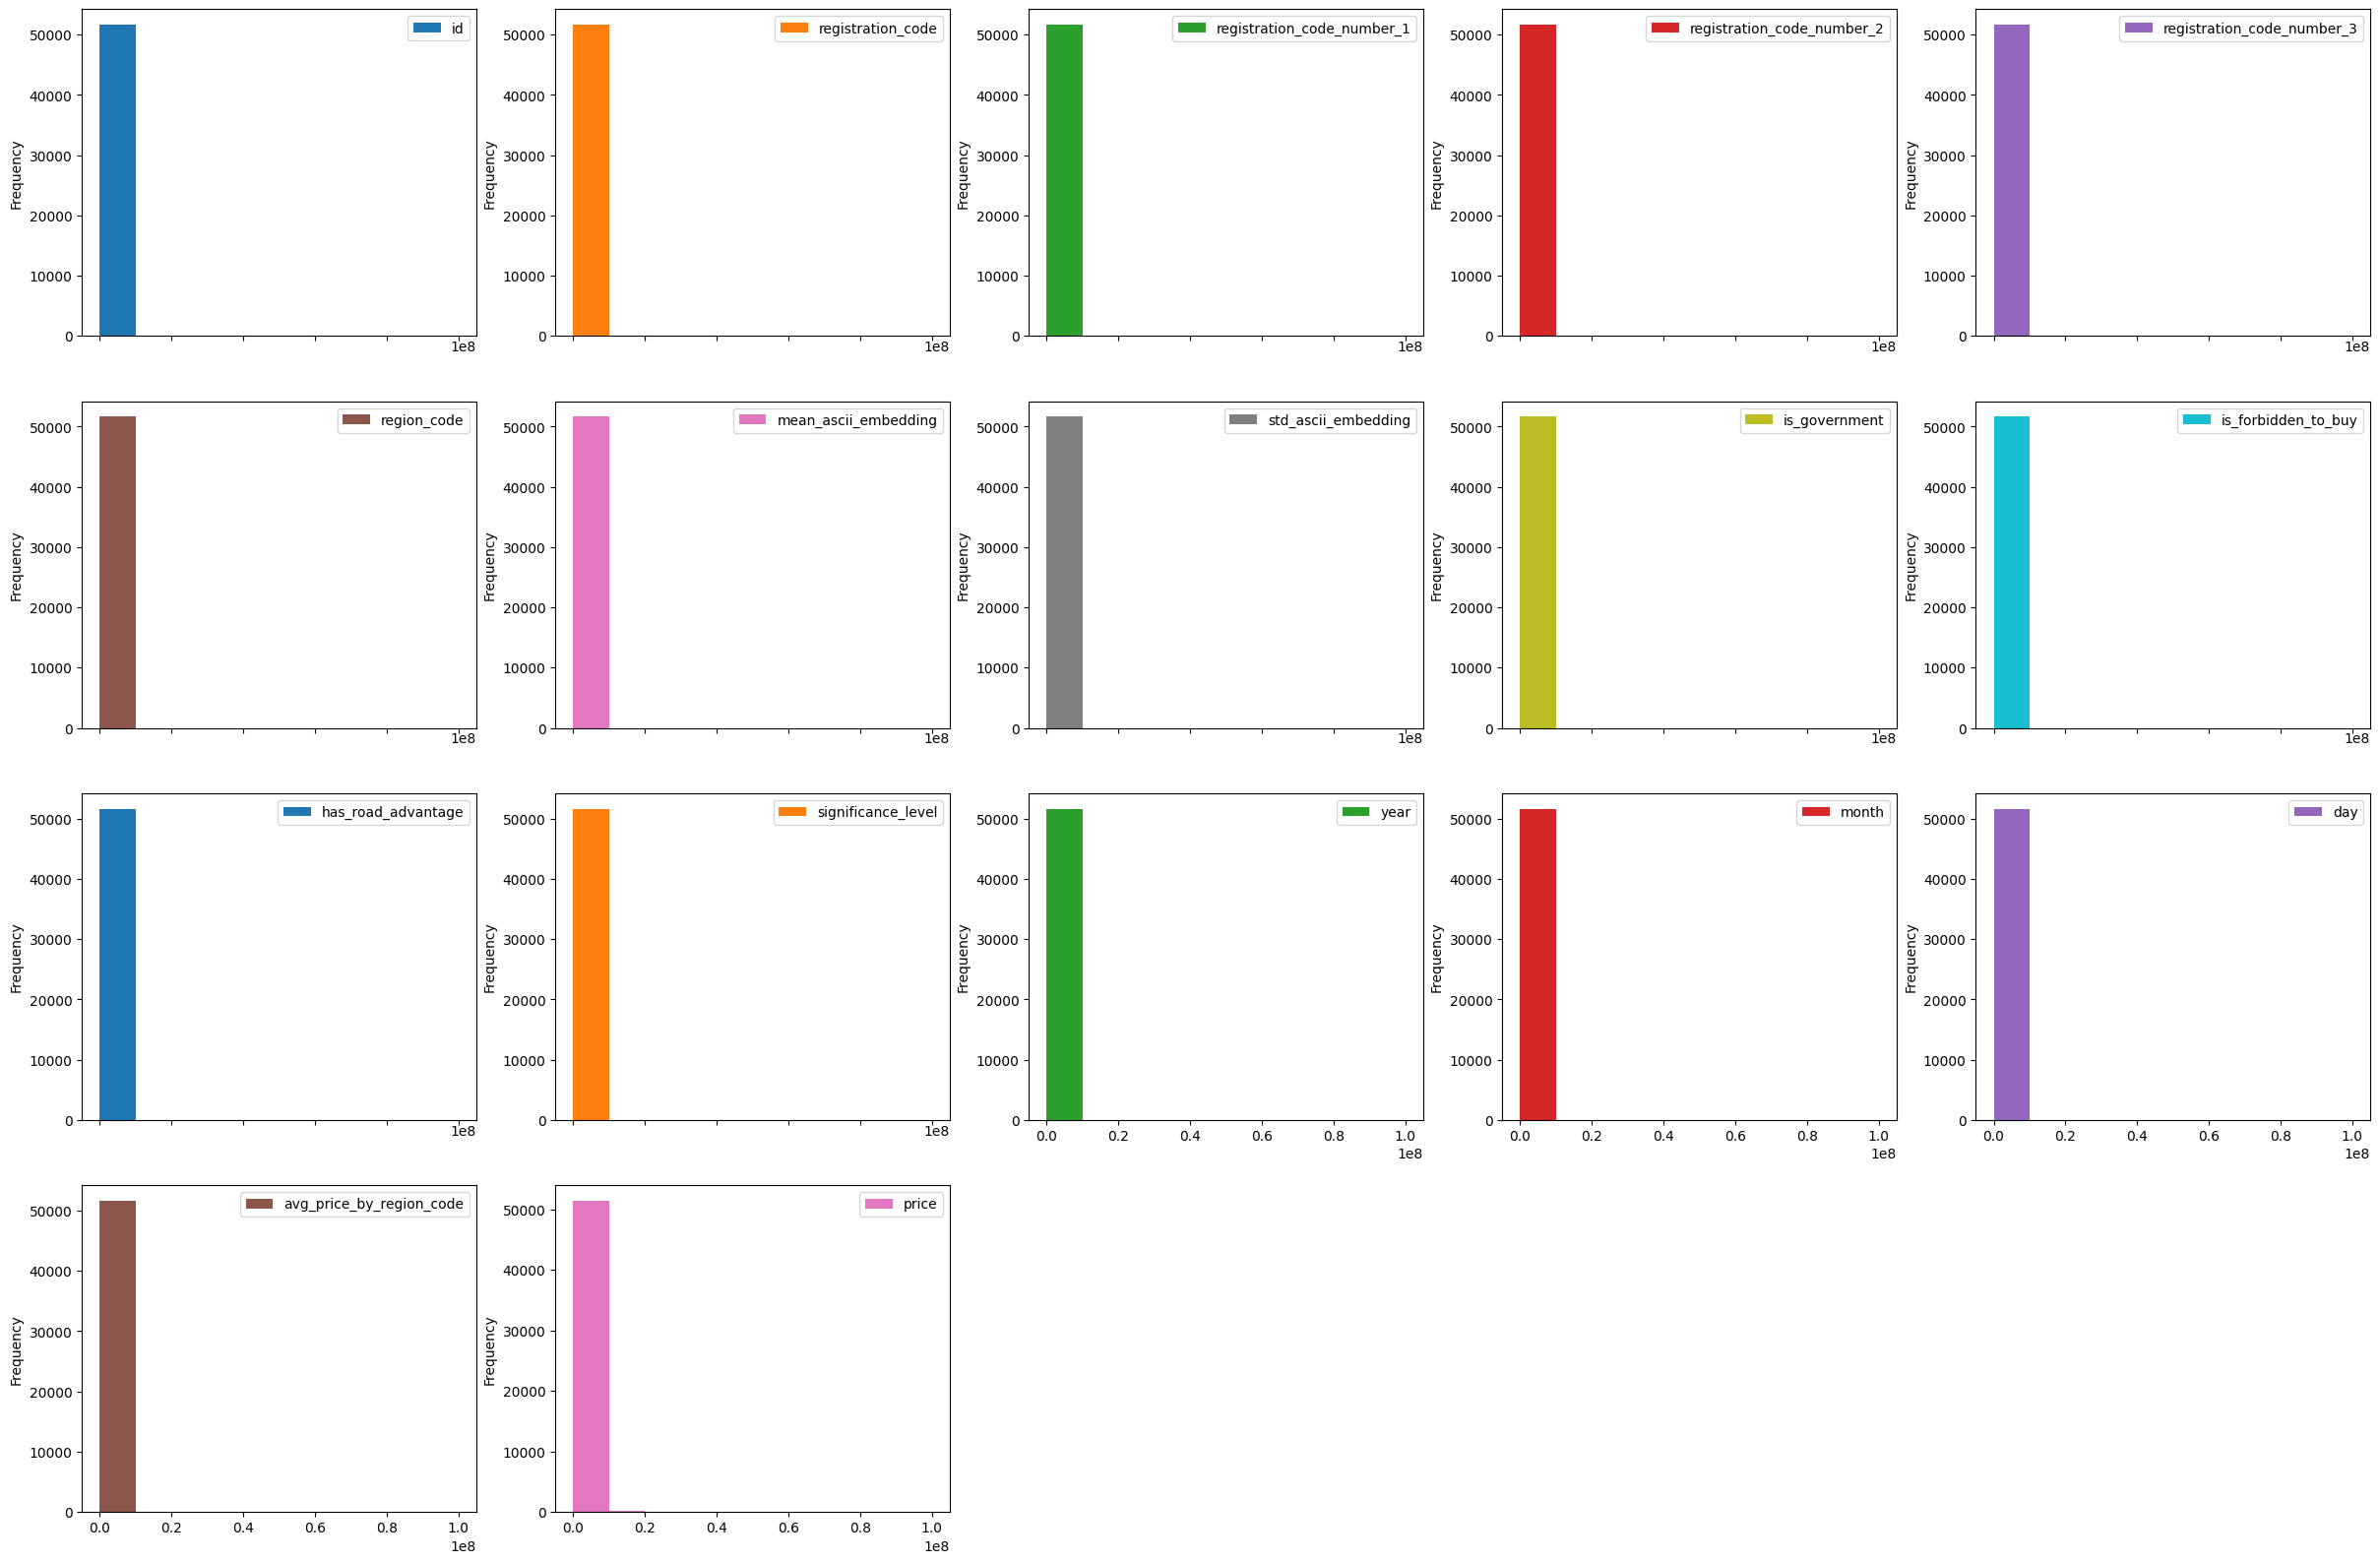

In [293]:
df.plot(kind='hist', subplots=True, figsize=(30, 25), layout=(5, 5))
plt.show()

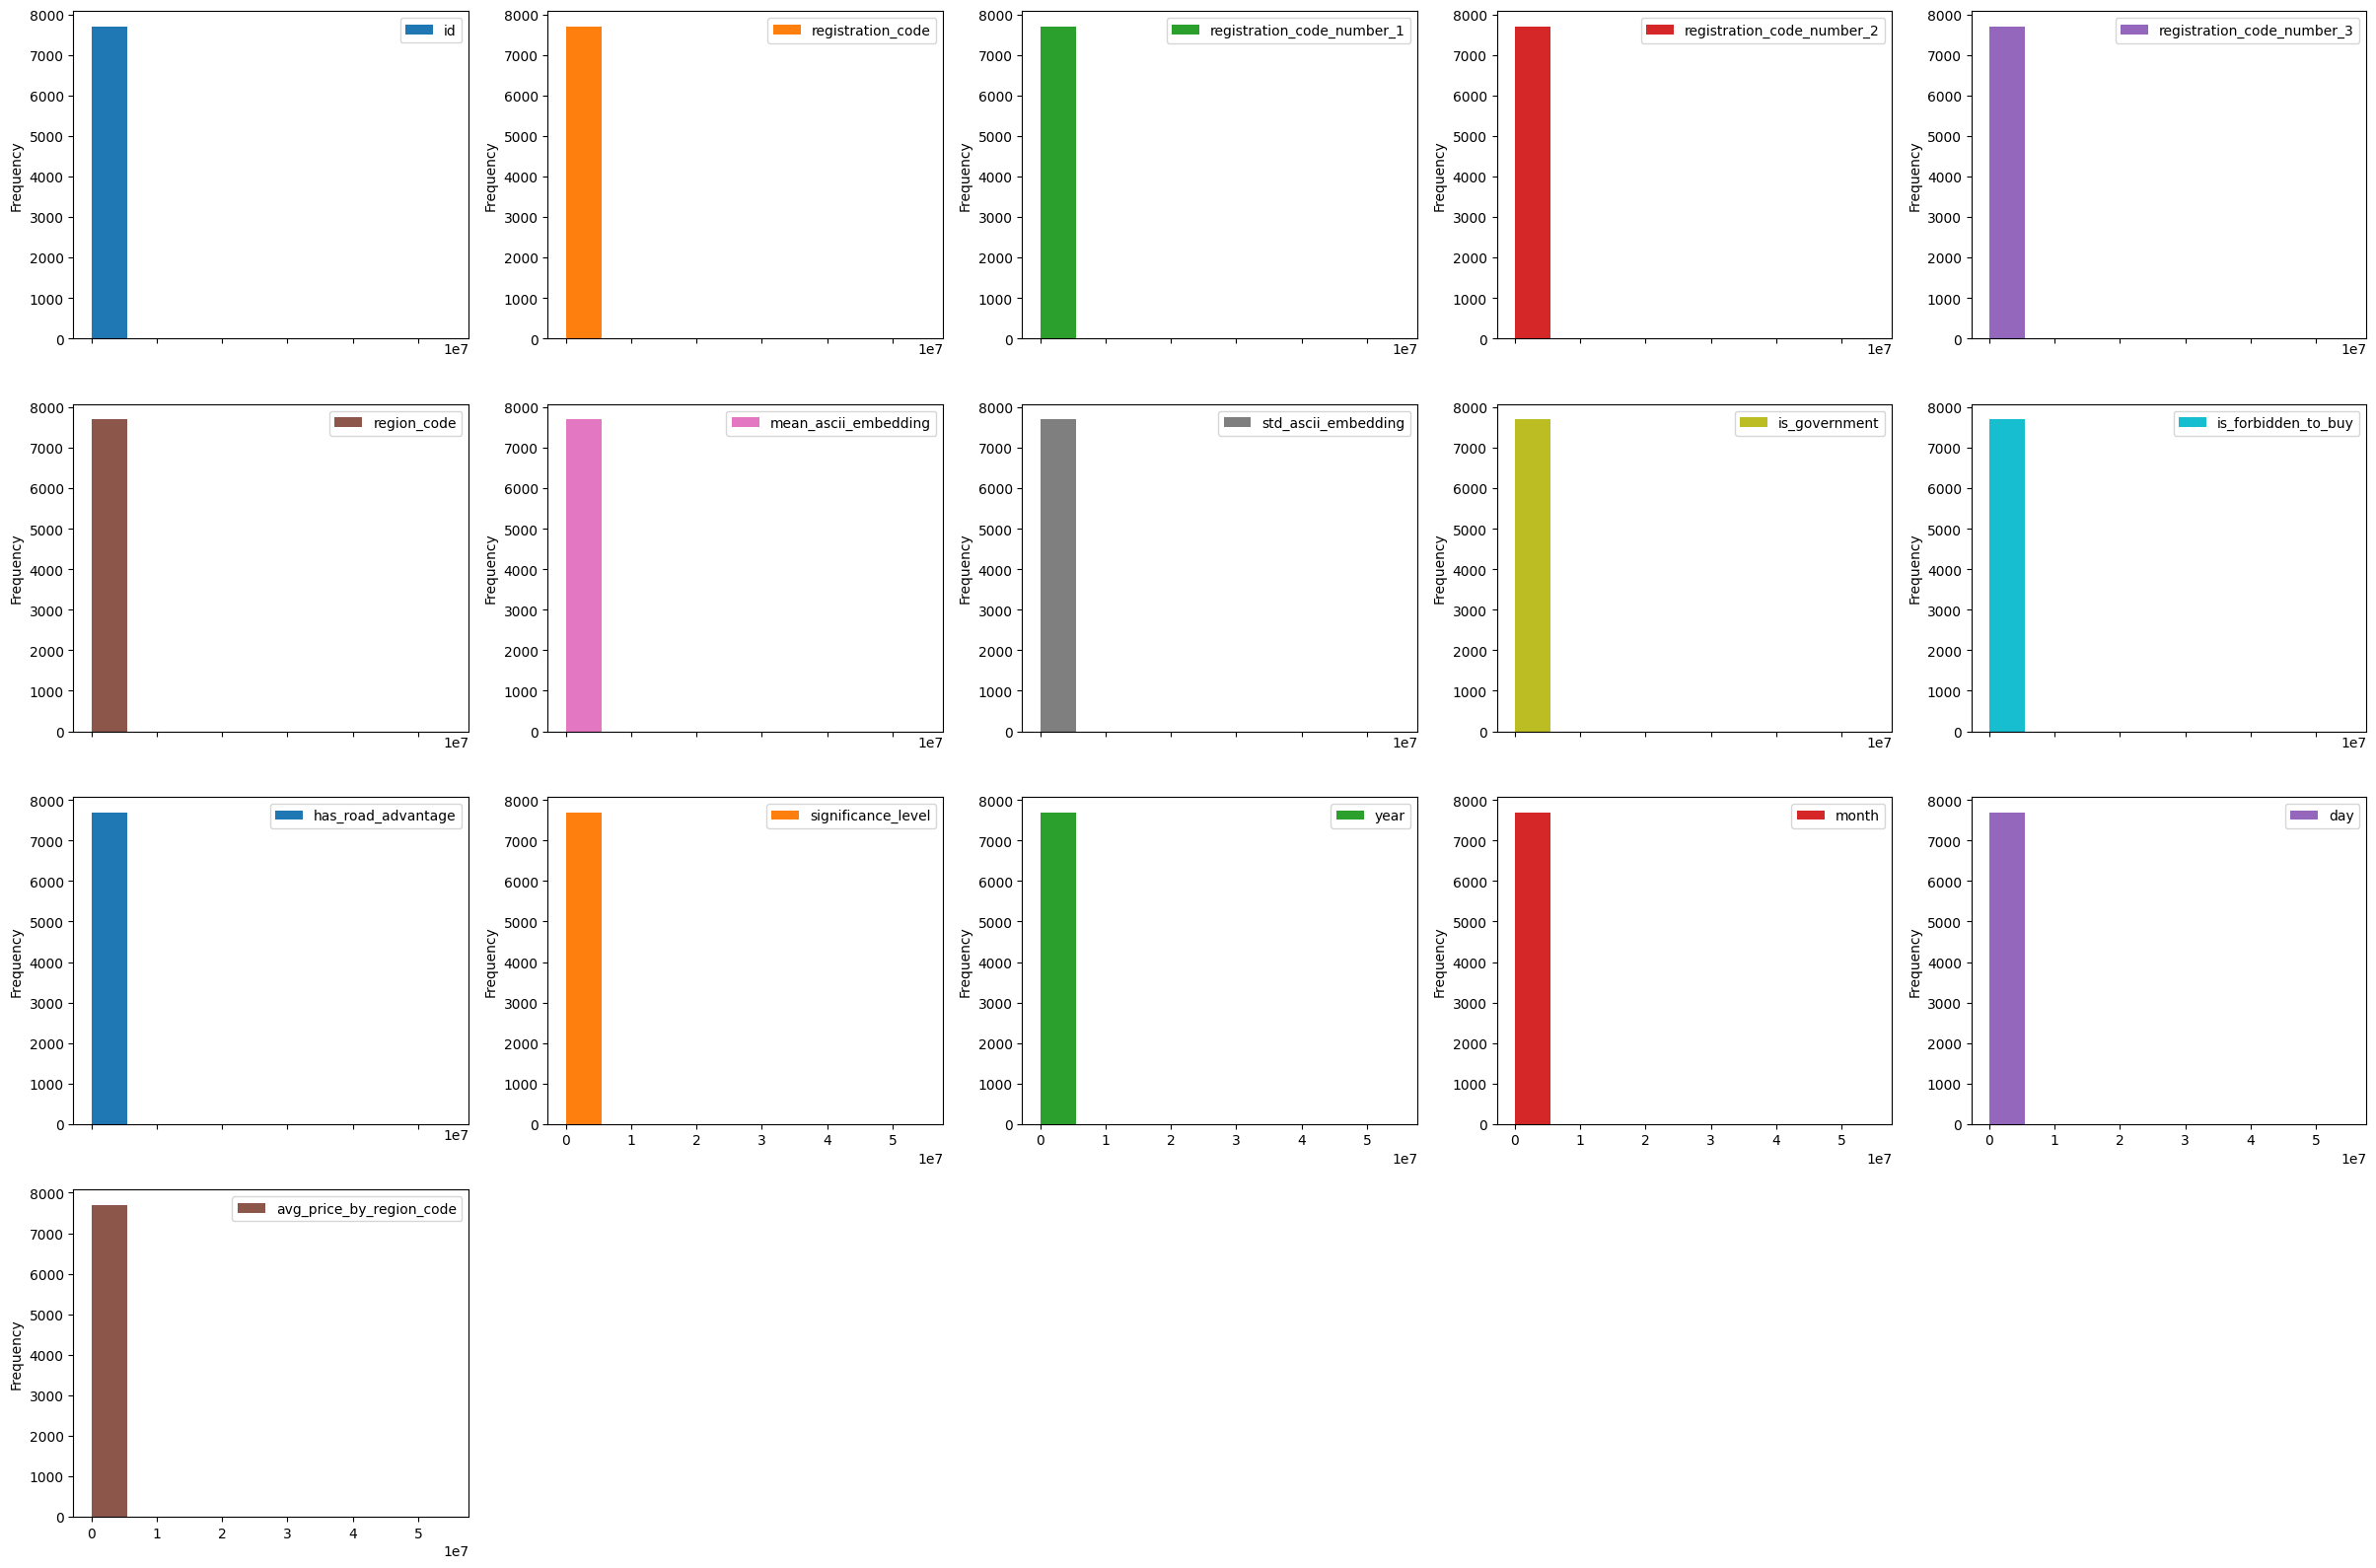

In [294]:
test_df.plot(kind='hist', subplots=True, figsize=(30, 25), layout=(5, 5))
plt.show()

## **Correlation**

In [295]:
num_cols = list(df.select_dtypes(['int64', 'int32', 'float64']).columns)

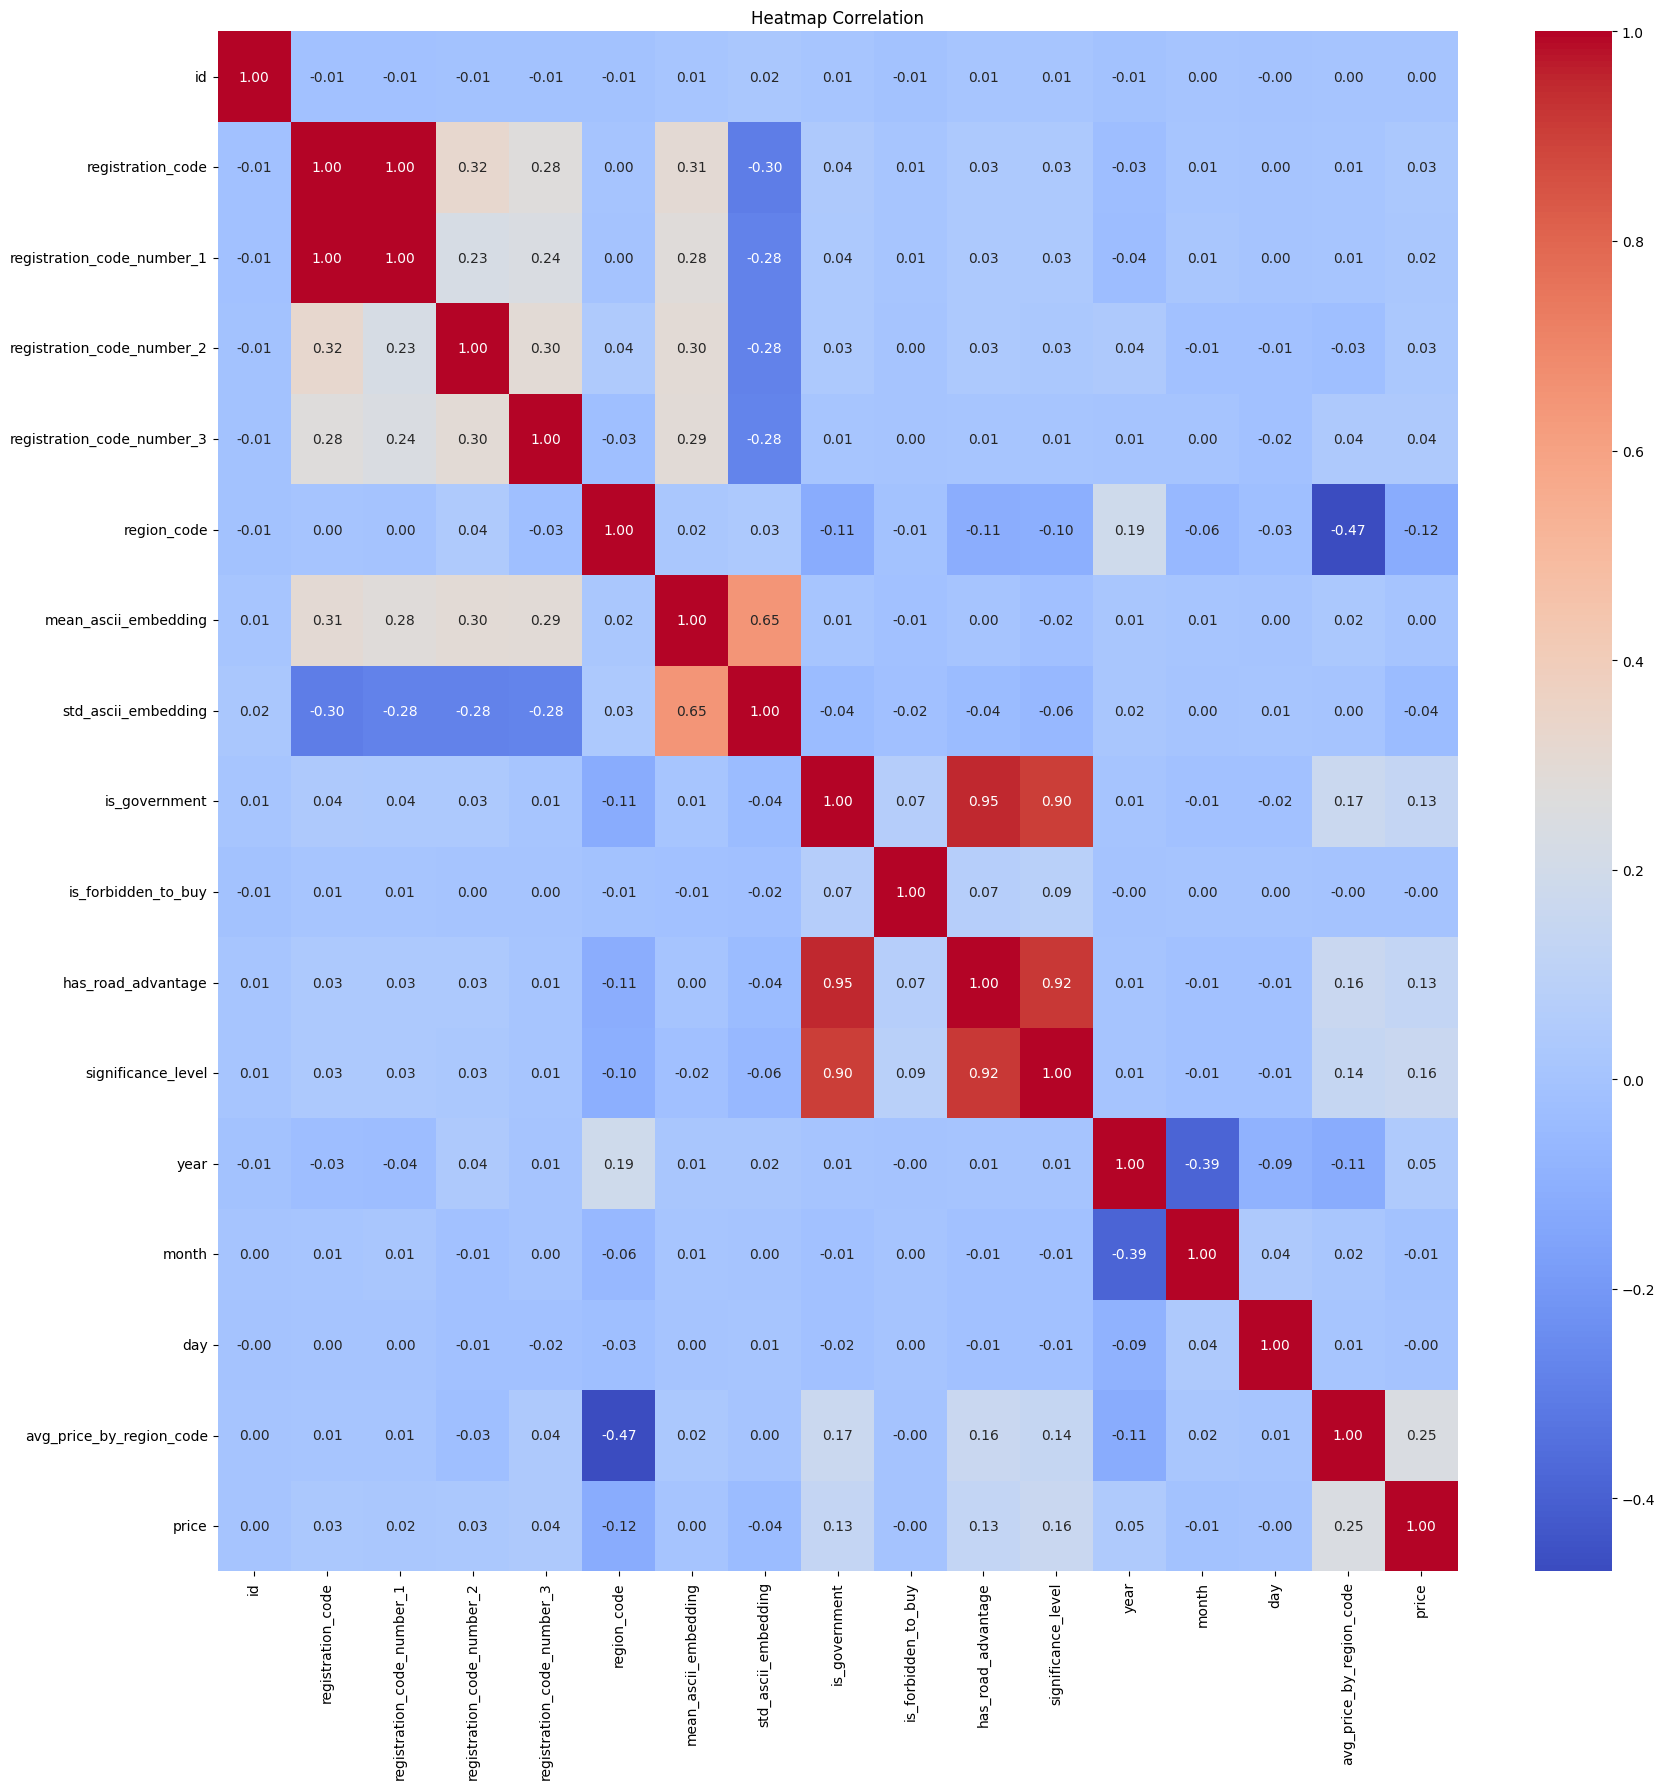

In [296]:
plt.figure(figsize=(20, 20))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Correlation")
plt.show()

## **Outliers**

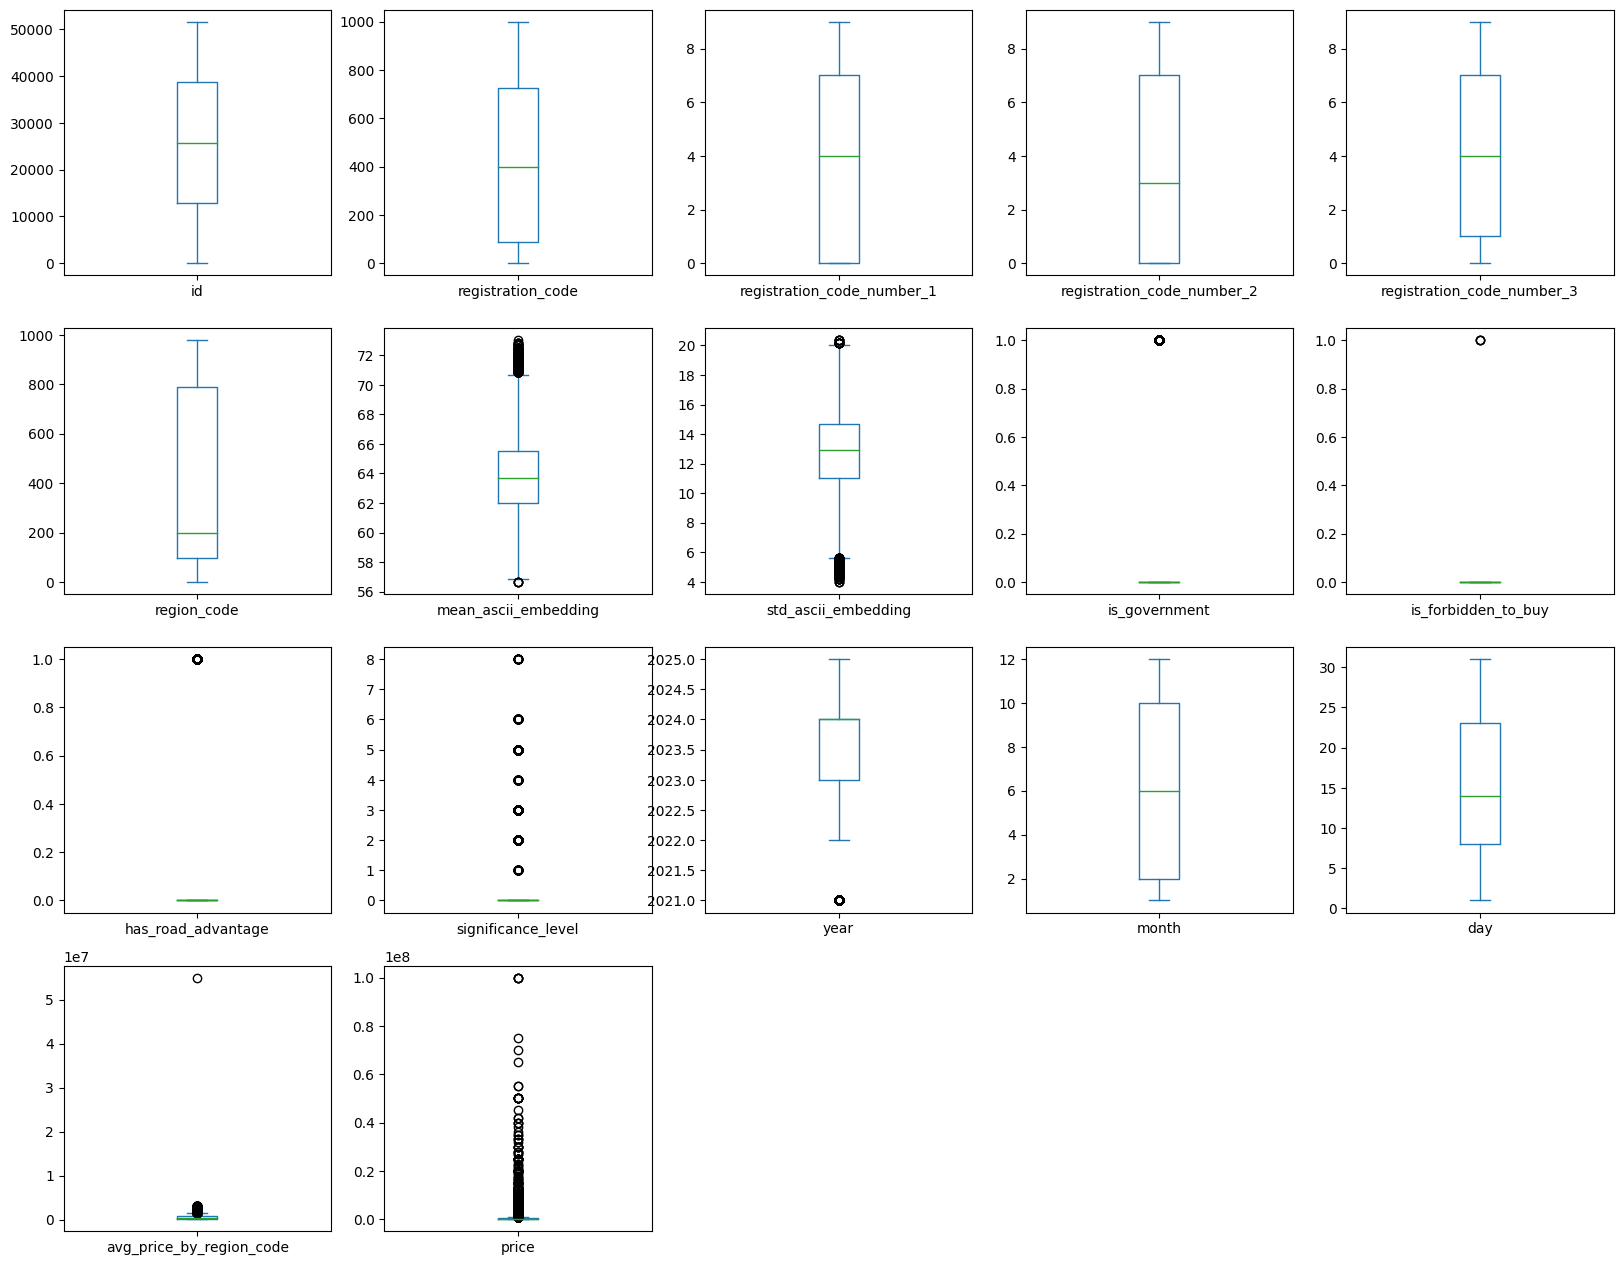

In [297]:
df.plot(kind="box", subplots=True, figsize=(20, 20), layout=(5, 5))
plt.show()

In [298]:
# df[df.price >= 0.8e8]

In [299]:
# df = df.drop(df[df.price >= 0.8e8].index, axis=0)

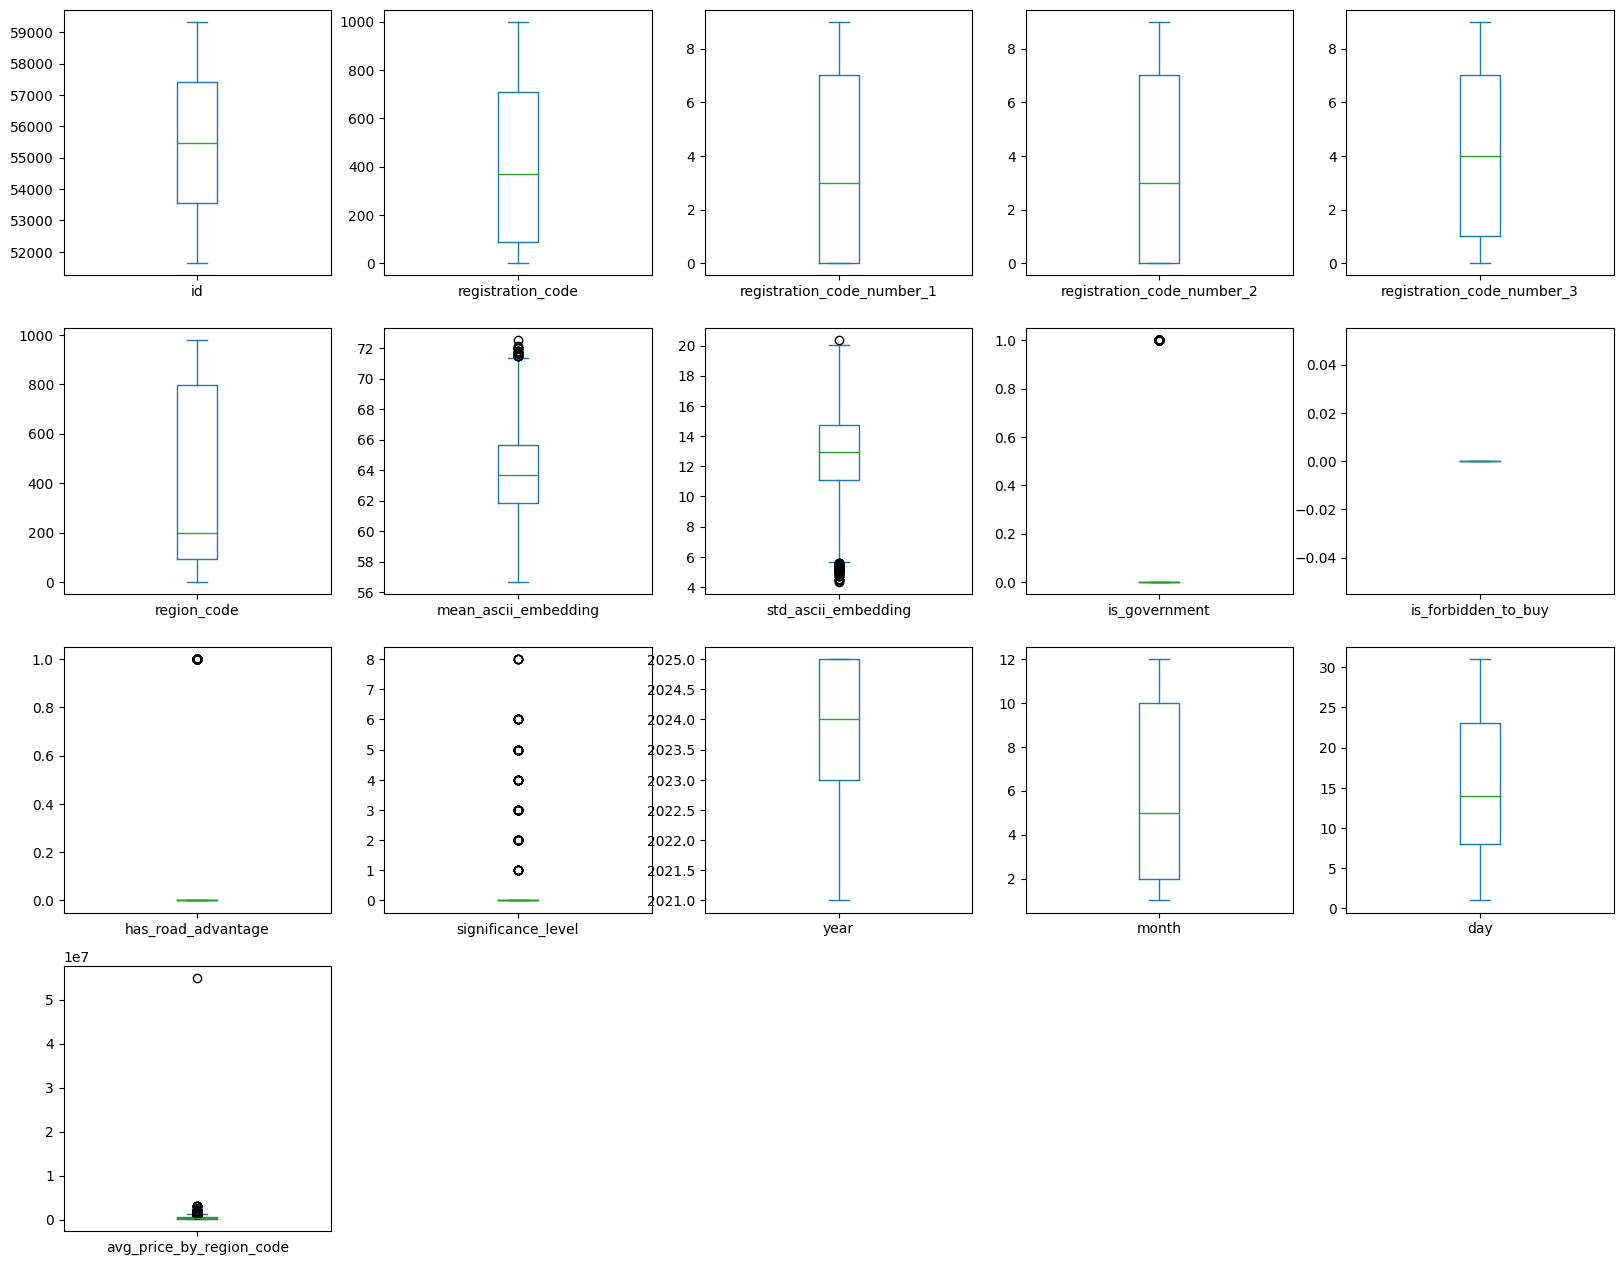

In [300]:
test_df.plot(kind="box", subplots=True, figsize=(20, 20), layout=(5, 5))
plt.show()

# **Exploratory Data Analysis**

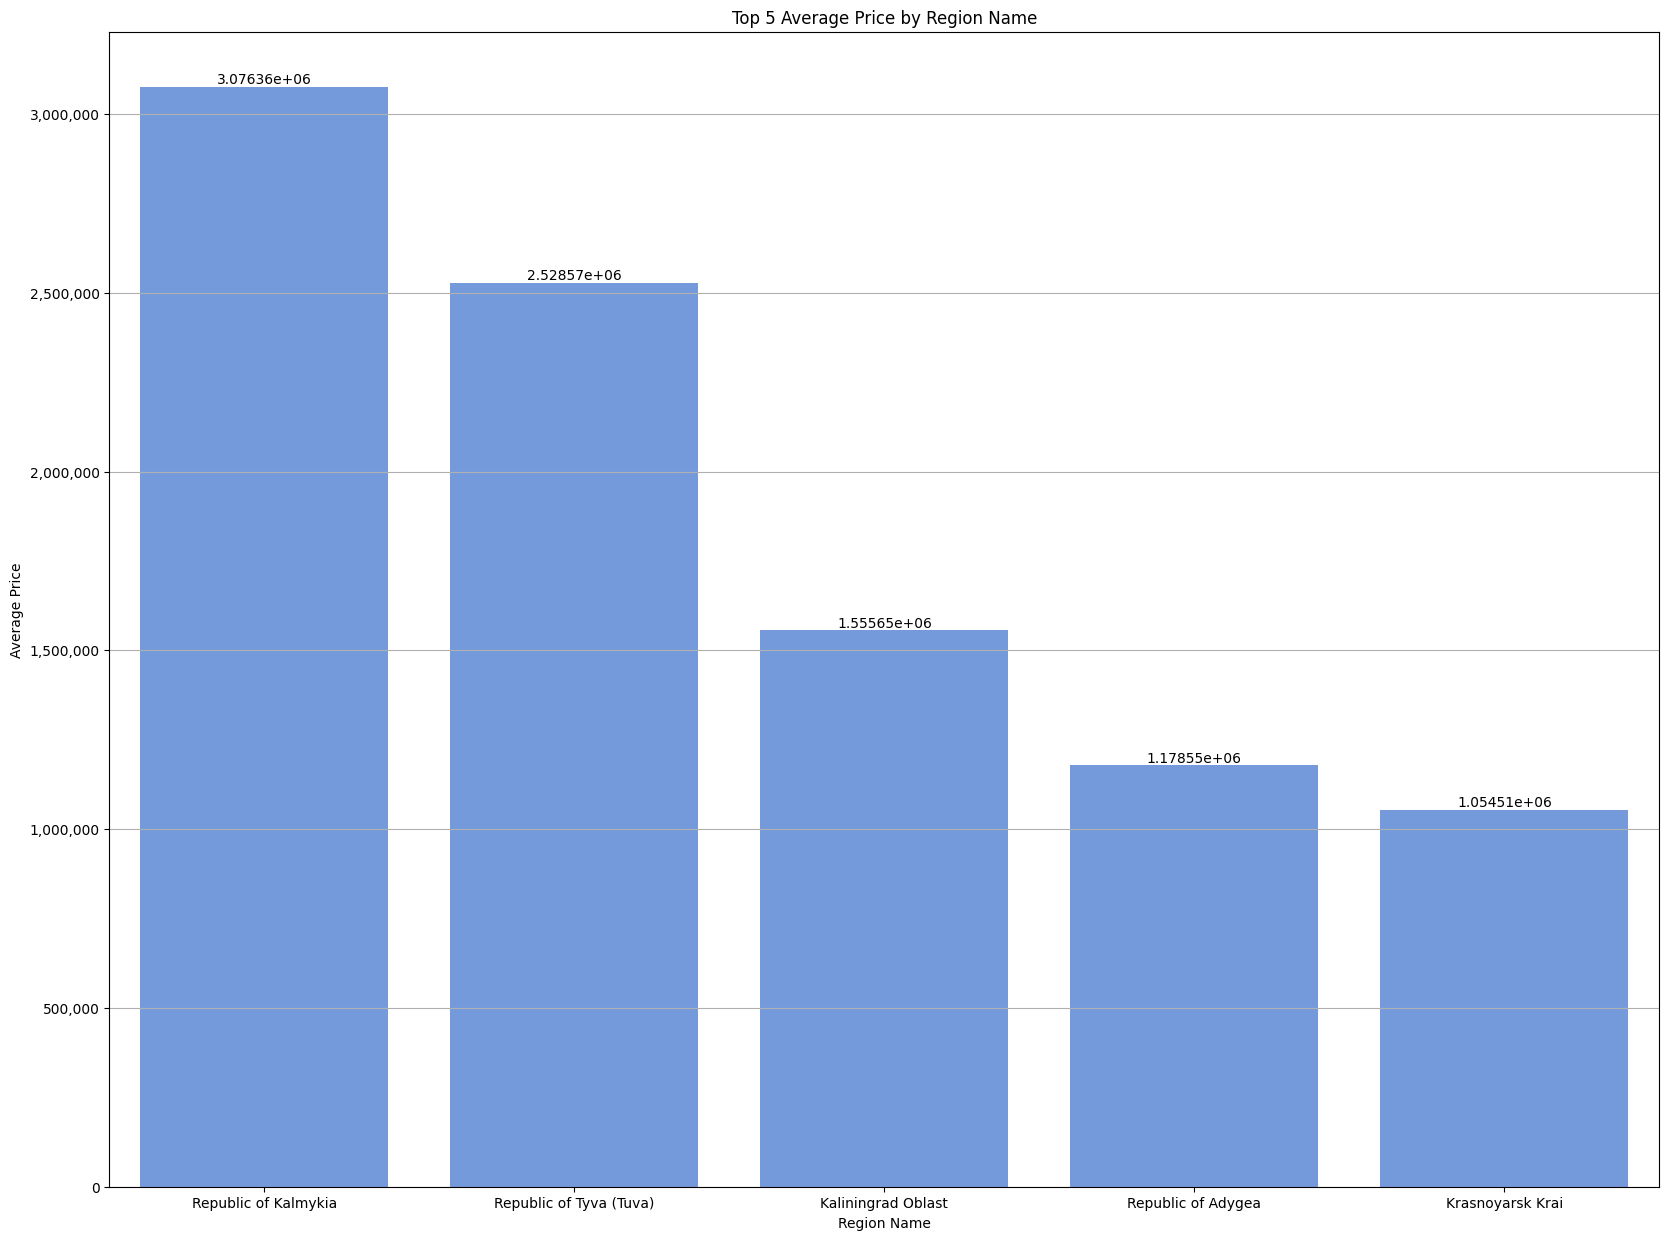

In [352]:
fig, ax = plt.subplots(figsize=(20, 15))
formatter = plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}')

region_name_avg_price = df.groupby('region_name')['price'].mean().sort_values(ascending=False).reset_index().head(5)

sns.barplot(
    x='region_name', 
    y='price', 
    data=region_name_avg_price, 
    color='cornflowerblue',
)

ax.set_title('Top 5 Average Price by Region Name')
ax.set_xlabel('Region Name')
ax.set_ylabel('Average Price')
ax.grid(axis='y')
ax.yaxis.set_major_formatter(formatter)
ax.bar_label(ax.containers[0])

plt.show()

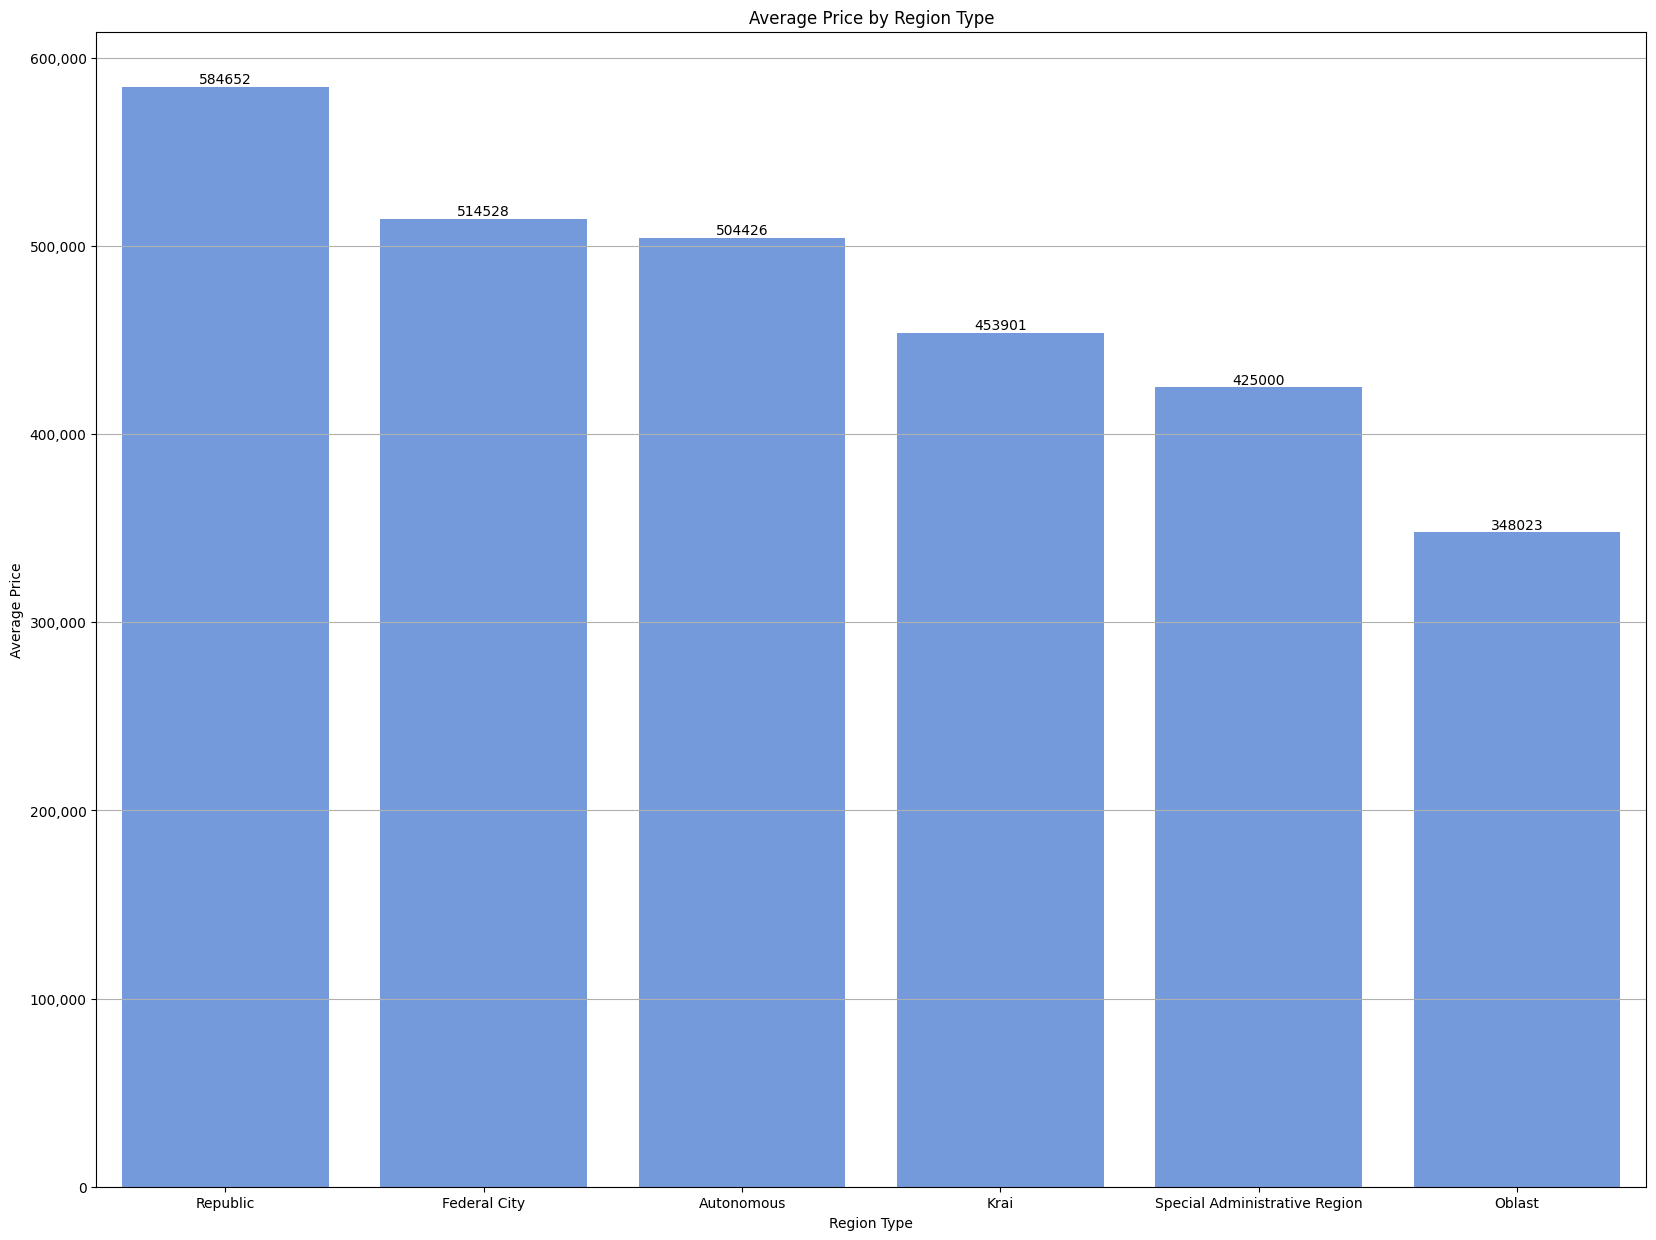

In [351]:
fig, ax = plt.subplots(figsize=(20, 15))
formatter = plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}')

region_type_avg_price = df.groupby('region_type')['price'].mean().sort_values(ascending=False).reset_index()

sns.barplot(
    x='region_type', 
    y='price', 
    data=region_type_avg_price, 
    color='cornflowerblue',
)

ax.set_title('Average Price by Region Type')
ax.set_xlabel('Region Type')
ax.set_ylabel('Average Price')
ax.grid(axis='y')
ax.yaxis.set_major_formatter(formatter)
ax.bar_label(ax.containers[0])

plt.show()

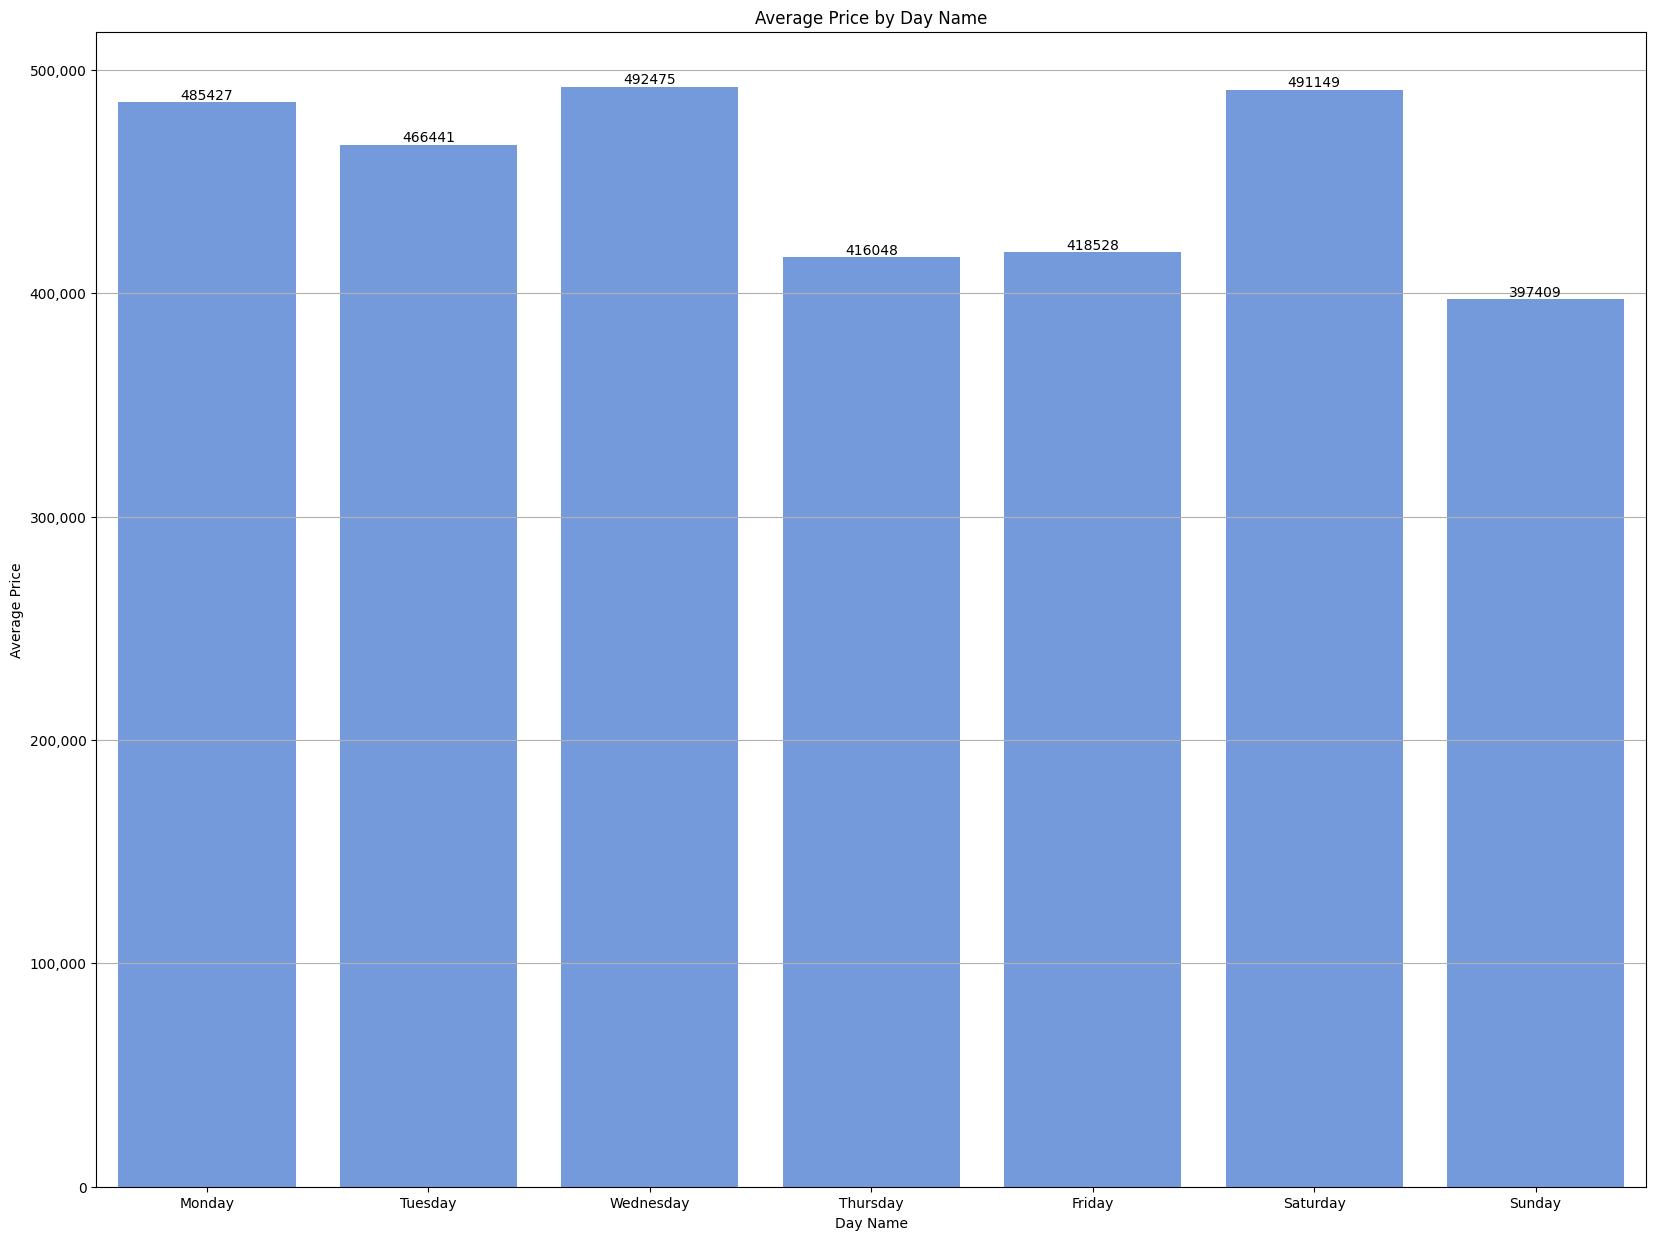

In [350]:
fig, ax = plt.subplots(figsize=(20, 15))
formatter = plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}')

day_name_avg_price = df.groupby('day_name')['price'].mean().reset_index()

sns.barplot(
    x='day_name', 
    y='price', 
    data=day_name_avg_price, 
    color='cornflowerblue',
    order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
)

ax.set_title('Average Price by Day Name')
ax.set_xlabel('Day Name')
ax.set_ylabel('Average Price')
ax.grid(axis='y')
ax.yaxis.set_major_formatter(formatter)
ax.bar_label(ax.containers[0])

plt.show()

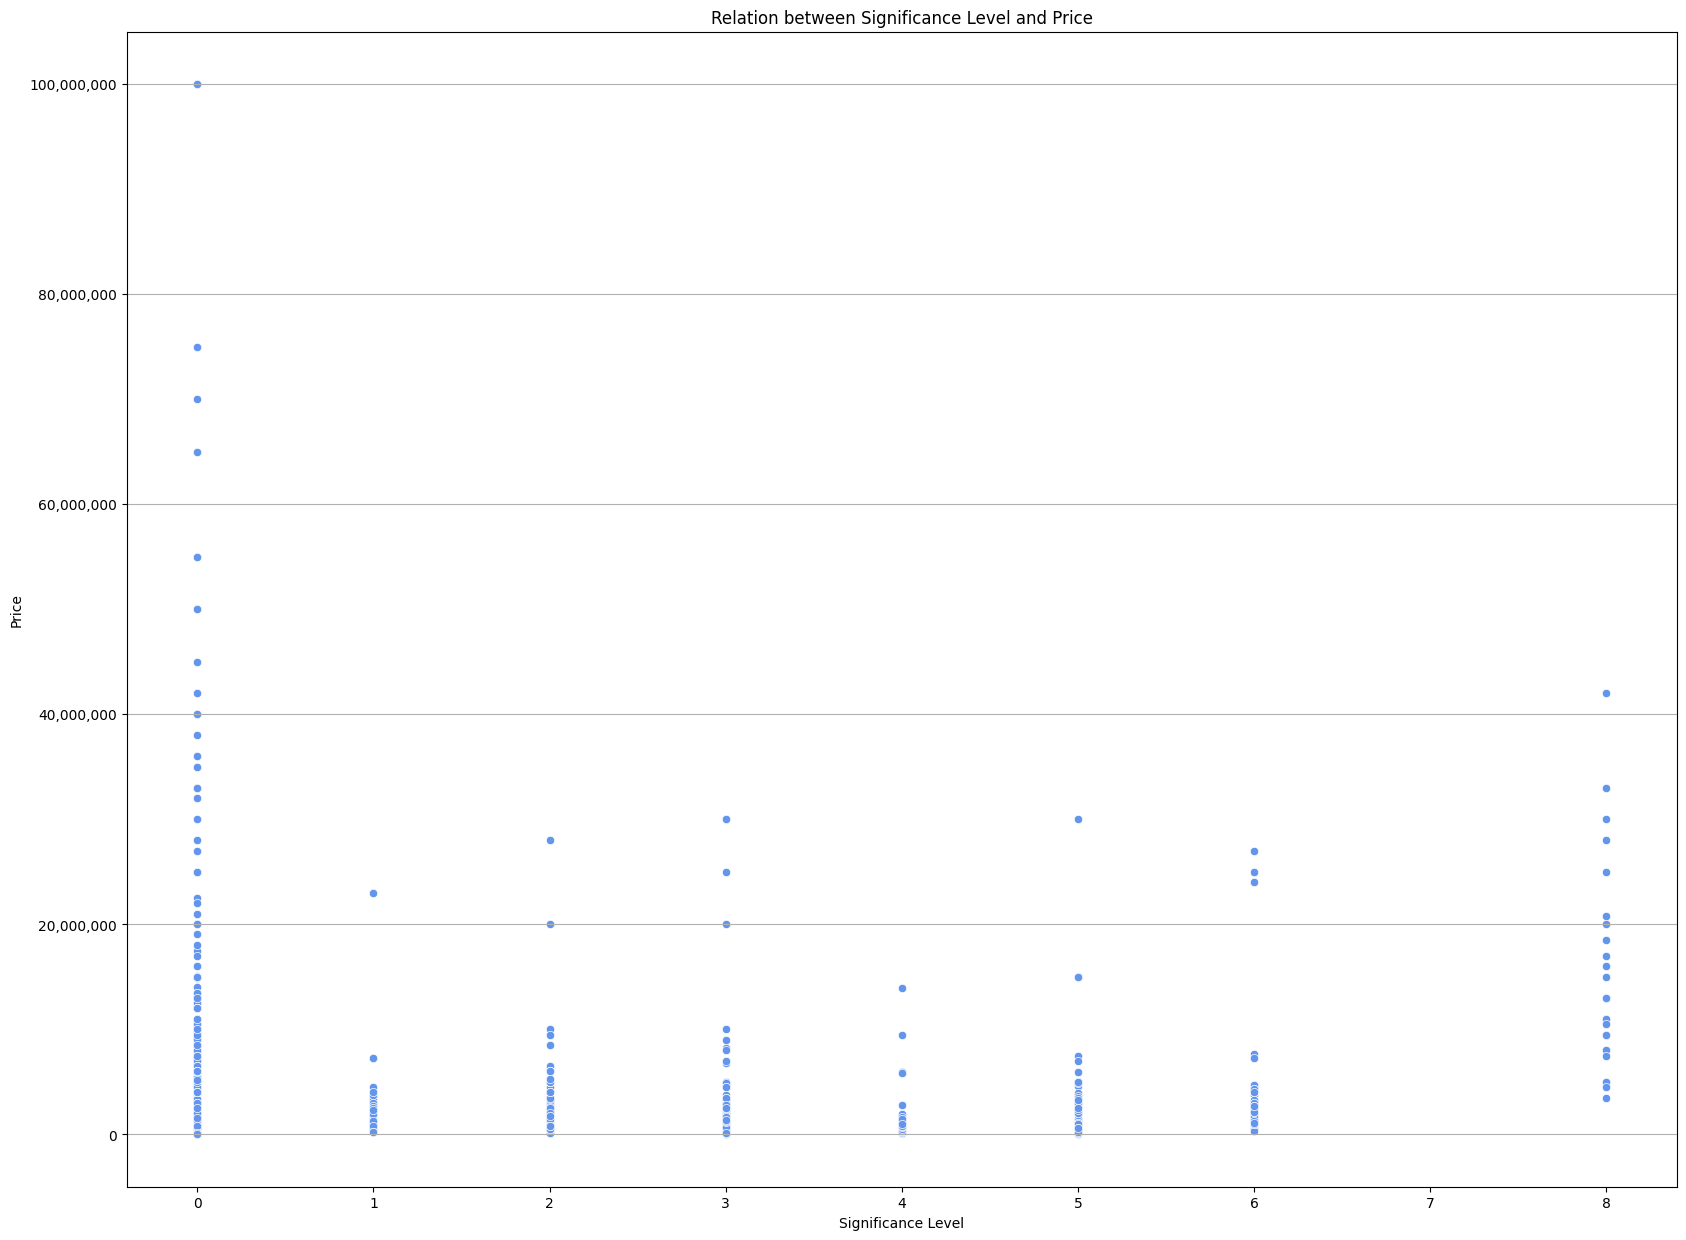

In [353]:
fig, ax = plt.subplots(figsize=(20, 15))
formatter = plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}')

sns.scatterplot(
    x='significance_level', 
    y='price', 
    data=df, 
    color='cornflowerblue',
)

ax.set_title('Relation between Significance Level and Price')
ax.set_xlabel('Significance Level')
ax.set_ylabel('Price')
ax.grid(axis='y')
ax.yaxis.set_major_formatter(formatter)

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


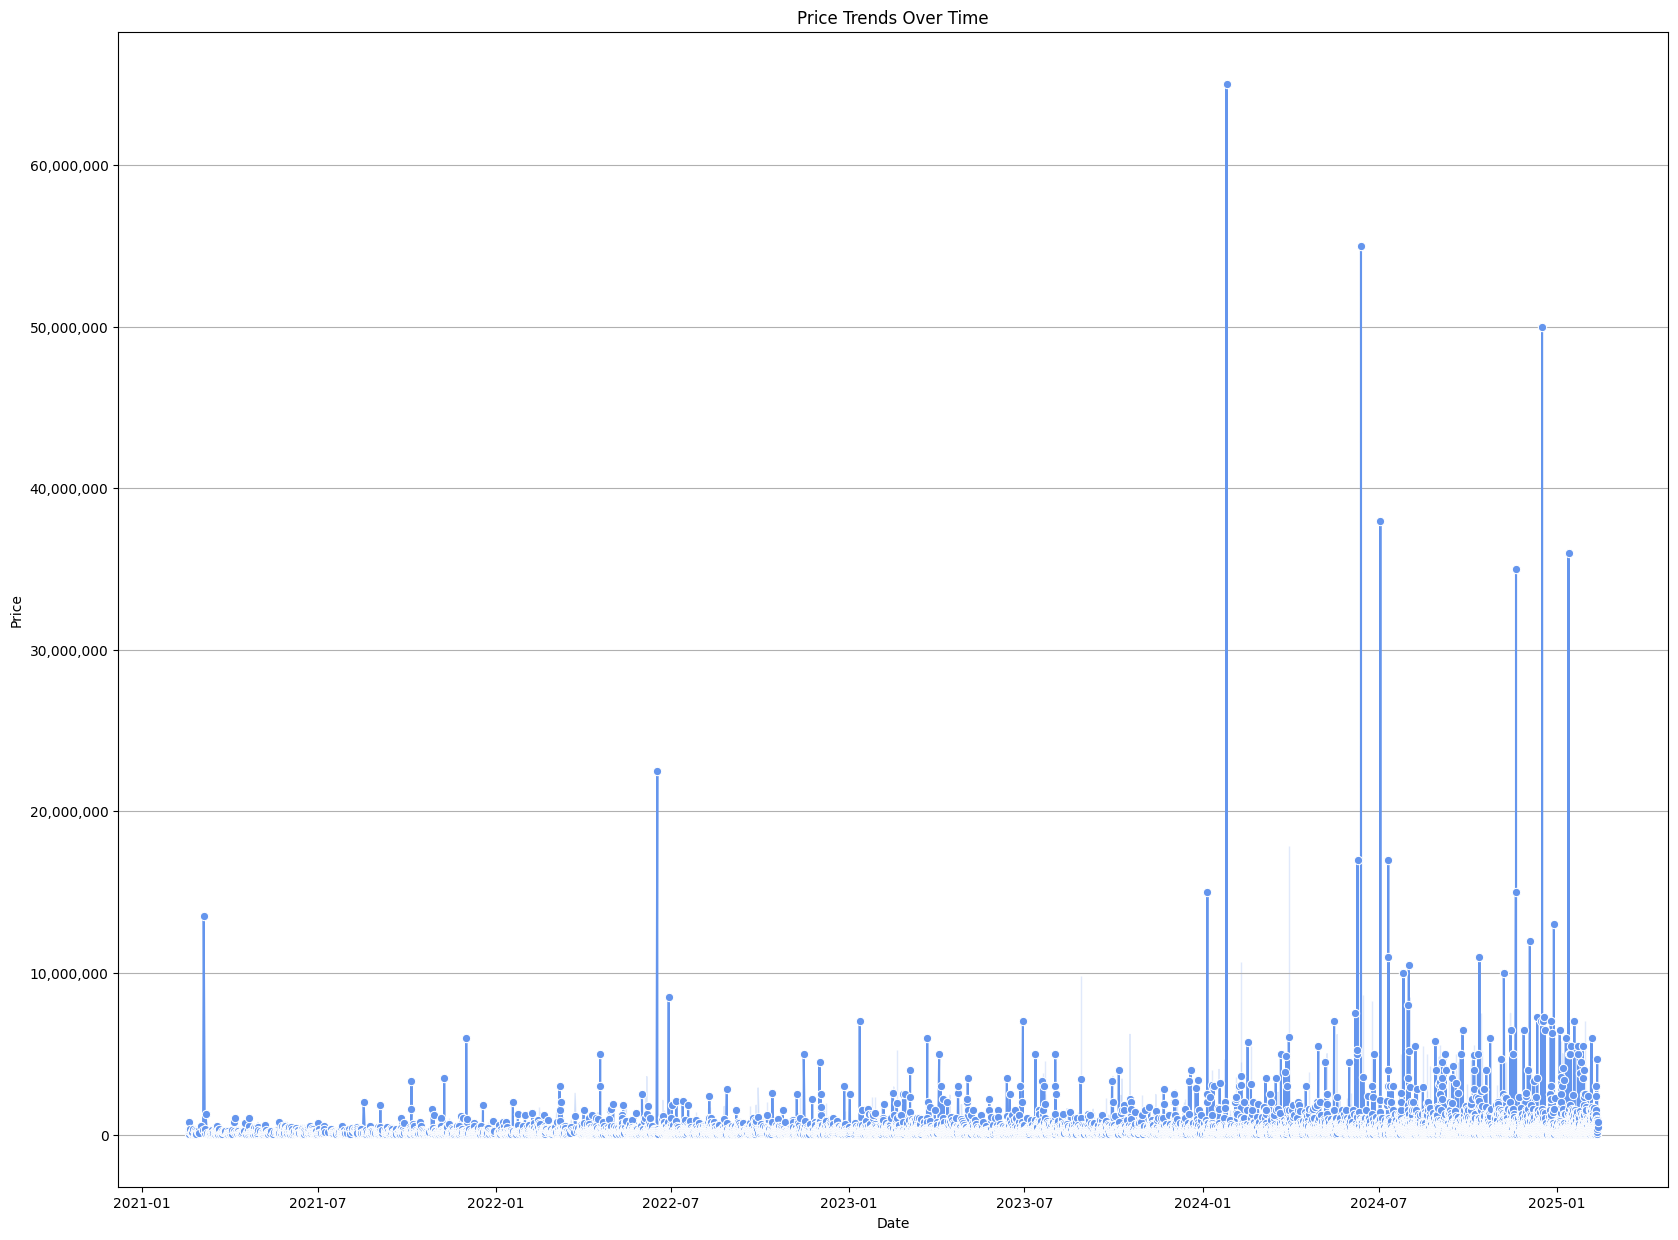

In [354]:
fig, ax = plt.subplots(figsize=(20, 15))
formatter = plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}')

sns.lineplot(
    x='date', 
    y='price', 
    data=df, 
    marker='o', 
    color='cornflowerblue',
)

ax.set_title('Price Trends Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.grid(axis='y')
ax.yaxis.set_major_formatter(formatter)

plt.show()

# **Feature Engineering 2**

## **Feature Dropping**

In [208]:
# df = df.drop(['id', 'plate', 'date', 'serial', 'region_name', 'gov_name'], axis=1)

df = df.drop([
    'id', 
    'plate', 
    'date', 
    'gov_name',
], axis=1)
df.sample(3)

,serial,serial_letter_1,serial_letter_2,serial_letter_3,registration_code,registration_code_number_1,registration_code_number_2,registration_code_number_3,region_code,region_name,mean_ascii_embedding,std_ascii_embedding,region_type,is_government,is_forbidden_to_buy,has_road_advantage,significance_level,year,month,day,day_name,avg_price_by_region_code,price
22495,OEC,O,E,C,400,4,0,0,716,Republic of Tatarstan,60.5,11.842719,Republic,0,0,0,0,2023,7,29,Saturday,236434.280488,200000
2592,COC,C,O,C,6,0,0,6,23,Krasnodar Krai,60.5,11.412712,Krai,0,0,0,0,2023,2,28,Tuesday,685924.855491,320000
32654,HMX,H,M,X,111,1,1,1,154,Novosibirsk Oblast,64.0,15.726835,Oblast,0,0,0,0,2022,5,12,Thursday,218915.519481,90000


In [209]:
# test_df = test_df.drop(['id', 'plate', 'date', 'serial', 'region_name', 'gov_name'], axis=1)

test_df = test_df.drop([
    'id', 
    'plate', 
    'date', 
    'gov_name',
], axis=1)
test_df.sample(3)

,serial,serial_letter_1,serial_letter_2,serial_letter_3,registration_code,registration_code_number_1,registration_code_number_2,registration_code_number_3,region_code,region_name,mean_ascii_embedding,std_ascii_embedding,region_type,is_government,is_forbidden_to_buy,has_road_advantage,significance_level,year,month,day,day_name,avg_price_by_region_code
6279,XTA,X,T,A,102,1,0,2,797,Moscow,64.000000,16.603213,Federal City,0,0,0,0,2024,11,17,Sunday,98940.443333
6099,YBX,Y,B,X,407,4,0,7,7,Kabardino-Balkarian Republic,66.333333,16.599866,Republic,0,0,0,0,2023,10,5,Thursday,432852.152542
6938,OAE,O,A,E,8,0,0,8,799,Moscow,60.833333,11.305112,Federal City,0,0,0,0,2025,2,9,Sunday,191702.606777


## **Feature Encoding**

### **One Hot Encoding**

In [210]:
# df = pd.get_dummies(
#     df,
#     columns=['region_type'],
#     dtype=int,
# )
# df.sample(3)

In [211]:
# test_df = pd.get_dummies(
#     test_df,
#     columns=['region_type'],
#     dtype=int,
# )
# test_df.sample(3)

### **Label Encoding**

In [212]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['serial'] = label_encoder.fit_transform(df['serial'])
test_df['serial'] = label_encoder.transform(test_df['serial'])

df['region_name'] = label_encoder.fit_transform(df['region_name'])
test_df['region_name'] = label_encoder.transform(test_df['region_name'])

df['region_type'] = label_encoder.fit_transform(df['region_type'])
test_df['region_type'] = label_encoder.transform(test_df['region_type'])

df['day_name'] = label_encoder.fit_transform(df['day_name'])
test_df['day_name'] = label_encoder.transform(test_df['day_name'])

df['serial_letter_1'] = label_encoder.fit_transform(df['serial_letter_1'])
test_df['serial_letter_1'] = label_encoder.transform(test_df['serial_letter_1'])

df['serial_letter_2'] = label_encoder.fit_transform(df['serial_letter_2'])
test_df['serial_letter_2'] = label_encoder.transform(test_df['serial_letter_2'])

df['serial_letter_3'] = label_encoder.fit_transform(df['serial_letter_3'])
test_df['serial_letter_3'] = label_encoder.transform(test_df['serial_letter_3'])

In [213]:
df.sample(3)

,serial,serial_letter_1,serial_letter_2,serial_letter_3,registration_code,registration_code_number_1,registration_code_number_2,registration_code_number_3,region_code,region_name,mean_ascii_embedding,std_ascii_embedding,region_type,is_government,is_forbidden_to_buy,has_road_advantage,significance_level,year,month,day,day_name,avg_price_by_region_code,price
6378,267,1,10,3,788,7,8,8,799,35,65.000000,11.604597,1,0,0,0,0,2025,1,24,0,191702.606777,150000
11579,1308,9,1,0,525,5,2,5,550,36,61.833333,11.653564,3,0,0,0,0,2025,1,30,4,105706.478398,100000
16876,773,5,4,5,262,2,6,2,62,64,62.666667,11.455227,3,0,0,0,0,2022,11,9,6,274991.701493,400000


In [214]:
test_df.sample(3)

,serial,serial_letter_1,serial_letter_2,serial_letter_3,registration_code,registration_code_number_1,registration_code_number_2,registration_code_number_3,region_code,region_name,mean_ascii_embedding,std_ascii_embedding,region_type,is_government,is_forbidden_to_buy,has_road_advantage,significance_level,year,month,day,day_name,avg_price_by_region_code
189,709,4,11,1,333,3,3,3,790,36,63.333333,14.126413,3,0,0,0,0,2024,12,24,5,1.576146e+05
890,1499,10,4,11,2,0,0,2,77,35,65.833333,18.040849,1,0,0,0,0,2024,10,5,2,1.345005e+06
1839,449,3,1,5,888,8,8,8,97,35,63.000000,7.483315,1,0,0,0,0,2023,9,28,4,9.977552e+05


### **Ordinal Encoding**

In [215]:
# from sklearn.preprocessing import OrdinalEncoder

# ordinal_encoder = OrdinalEncoder()

# df['serial'] = ordinal_encoder.fit_transform(df['serial'])
# test_df['serial'] = ordinal_encoder.transform(test_df['serial'])

# df['region_name'] = ordinal_encoder.fit_transform(df['region_name'])
# test_df['region_name'] = ordinal_encoder.transform(test_df['region_name'])

In [216]:
df.sample(3)

,serial,serial_letter_1,serial_letter_2,serial_letter_3,registration_code,registration_code_number_1,registration_code_number_2,registration_code_number_3,region_code,region_name,mean_ascii_embedding,std_ascii_embedding,region_type,is_government,is_forbidden_to_buy,has_road_advantage,significance_level,year,month,day,day_name,avg_price_by_region_code,price
6870,942,6,6,6,745,7,4,5,777,35,65.166667,11.866152,1,0,0,0,0,2025,2,8,2,717377.414559,950000
40219,149,1,0,5,800,8,0,0,199,35,59.666667,9.910712,1,0,0,0,0,2021,11,5,0,556036.785457,100000
5147,84,0,7,0,393,3,9,3,15,60,61.333333,9.758187,4,0,0,0,0,2022,10,18,5,387988.636364,200000


In [217]:
test_df.sample(3)

,serial,serial_letter_1,serial_letter_2,serial_letter_3,registration_code,registration_code_number_1,registration_code_number_2,registration_code_number_3,region_code,region_name,mean_ascii_embedding,std_ascii_embedding,region_type,is_government,is_forbidden_to_buy,has_road_advantage,significance_level,year,month,day,day_name,avg_price_by_region_code
5084,604,4,2,4,606,6,0,6,178,65,61.166667,9.529195,1,0,0,0,0,2024,7,28,3,430726.668810
4511,1116,7,9,0,979,9,7,9,777,35,66.166667,11.378586,1,0,0,0,0,2022,9,24,2,717377.414559
3341,294,2,0,6,30,0,3,0,550,36,59.333333,11.025224,3,0,0,0,0,2025,2,12,6,105706.478398


## **Feature Selection**

### **Filter Methods**

In [218]:
X = df.drop(['price'], axis=1)
y = df['price']

In [219]:
from sklearn.feature_selection import SelectKBest, chi2

filter_selector = SelectKBest(score_func=chi2, k='all')
X_filter = filter_selector.fit(X, y)
filter_selected_cols = pd.DataFrame(X.columns)
filter_selected_scores = pd.DataFrame(X_filter.scores_)
df_filter = pd.concat([filter_selected_cols, filter_selected_scores], axis=1)
df_filter.columns = ['Columns', 'Score']
df_filter.sort_values(by=['Score'], ascending=False, inplace=True)
df_filter.reset_index(drop=True, inplace=True)
df_filter.style.background_gradient(cmap='Blues')

,Columns,Score
0,avg_price_by_region_code,10941078274.388422
1,region_code,2500716.542069
2,serial,369478.682342
3,registration_code,340122.294731
4,significance_level,35280.362562
5,is_government,6307.509467
6,has_road_advantage,6169.980798
7,registration_code_number_2,5727.204161
8,day,5303.211670
9,region_name,4913.642922


## **Feature Scaling**

In [220]:
# from sklearn.preprocessing import MinMaxScaler

# cols = [
#     'registration_code',
#     'region_code',
#     'significance_level',
#     'year',
#     'month',
#     'day',
#     'day_of_week',
#     'avg_price_by_region_code',
# ]

# scaler = MinMaxScaler()
# df[cols] = scaler.fit_transform(df[cols])
# test_df[cols] = scaler.transform(test_df[cols])

In [221]:
df.sample(3)

,serial,serial_letter_1,serial_letter_2,serial_letter_3,registration_code,registration_code_number_1,registration_code_number_2,registration_code_number_3,region_code,region_name,mean_ascii_embedding,std_ascii_embedding,region_type,is_government,is_forbidden_to_buy,has_road_advantage,significance_level,year,month,day,day_name,avg_price_by_region_code,price
7920,291,2,0,3,733,7,3,3,550,36,59.666667,7.542472,3,0,0,0,0,2025,1,2,4,105706.478398,30000
49762,559,3,10,7,750,7,5,0,750,36,65.333333,14.567849,3,0,0,0,0,2024,7,1,1,264676.723480,230000
38802,829,5,9,1,747,7,4,7,790,36,64.500000,11.757976,3,0,0,0,0,2024,12,5,4,157614.550733,55000


In [222]:
test_df.sample(3)

,serial,serial_letter_1,serial_letter_2,serial_letter_3,registration_code,registration_code_number_1,registration_code_number_2,registration_code_number_3,region_code,region_name,mean_ascii_embedding,std_ascii_embedding,region_type,is_government,is_forbidden_to_buy,has_road_advantage,significance_level,year,month,day,day_name,avg_price_by_region_code
3157,102,0,8,6,466,4,6,6,797,35,63.666667,11.323525,1,0,0,0,0,2025,2,8,2,98940.443333
7525,1544,10,8,8,676,6,7,6,797,35,68.500000,14.419316,1,0,0,0,0,2025,2,10,1,98940.443333
145,1444,10,0,4,463,4,6,3,5,53,63.666667,13.249738,4,0,0,0,0,2024,7,26,0,801778.213716


## **Feature Splitting**

In [223]:
from sklearn.model_selection import train_test_split

X = df.drop(['price'], axis=1)
y = df['price']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_test = test_df

# **Modeling**

In [225]:
from sklearn.metrics import make_scorer

def symmetric_mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2  # Menggunakan rata-rata absolut
    smape_value = np.mean(np.abs(y_pred - y_true) / denominator) * 100
    return smape_value

symmetric_mean_absolute_percentage_error = make_scorer(symmetric_mean_absolute_percentage_error, greater_is_better=False)

In [226]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

models_params = {
    'Decision Tree': (DecisionTreeRegressor(),
                     {'max_depth': [15, 20, 25, 30, 35], 'min_samples_split': [20, 25, 30, 35, 40]}),

    'Random Forest': (RandomForestRegressor(random_state=42),
                     {'max_depth': [32, 35, 37, 40, 42, 45, 47, 50], 'n_estimators': [100, 125, 150, 175]}),

    'Bagging': (BaggingRegressor(random_state=42),
                {'n_estimators': [75, 100, 120]}),
}

In [227]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

cv = KFold(n_splits=5, shuffle=True, random_state=42)

best_models = {}

# TRAIN
for model_name, (model, params) in models_params.items():
    print(f"Tuning {model_name}\n")

    # If the models don't have a hyperparameter, we have to fit them
    if not params:
        model.fit(X_train, y_train)
        best_models[model_name] = model
        continue

    # Grid Search
    grid_search = GridSearchCV(
        model,
        params,
        cv=cv,
        scoring=symmetric_mean_absolute_percentage_error,
        n_jobs=-1,
    )
    grid_search.fit(X_train, y_train)

    # Save best models
    best_models[model_name] = grid_search.best_estimator_

    # Print best results
    print(f'Best params for {model_name}: {grid_search.best_params_}')
    print(f'Best SMAPE: {abs(grid_search.best_score_):.3f}\n')

Tuning Decision Tree

Best params for Decision Tree: {'max_depth': 20, 'min_samples_split': 25}
Best SMAPE: 58.517

Tuning Random Forest



/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best params for Random Forest: {'max_depth': 45, 'n_estimators': 100}
Best SMAPE: 59.290

Tuning Bagging

Best params for Bagging: {'n_estimators': 75}
Best SMAPE: 59.346



In [234]:
# feature_importance = pd.DataFrame({
#     'Feature': X_train.columns,
#     'Importance': best_models['Decision Tree'].feature_importances_
# }).sort_values(by='Importance', ascending=False)

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_models['Random Forest'].feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance

,Feature,Importance
21,avg_price_by_region_code,1.205757e-01
0,serial,1.067389e-01
11,std_ascii_embedding,1.066040e-01
4,registration_code,1.033650e-01
19,day,9.219188e-02
10,mean_ascii_embedding,7.225460e-02
18,month,4.910186e-02
3,serial_letter_3,4.147259e-02
16,significance_level,3.815522e-02
8,region_code,3.732038e-02


In [229]:
def symmetric_mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2  # Menggunakan rata-rata absolut
    smape_value = np.mean(np.abs(y_pred - y_true) / denominator) * 100
    return smape_value

# VAL
for model_name, model in best_models.items():
    y_pred = model.predict(X_val)
    smape_score = symmetric_mean_absolute_percentage_error(y_val, y_pred)
    print(f'{model_name} SMAPE: {smape_score:.3f}')

Decision Tree SMAPE: 58.661
Random Forest SMAPE: 58.971
Bagging SMAPE: 58.861


Decision Tree SMAPE: 60.423
Random Forest SMAPE: 59.842
Bagging SMAPE: 59.876

In [230]:
# TEST
# sample_submission_df['price'] = best_models['Random Forest'].predict(X_test)
sample_submission_df['price'] = best_models['Decision Tree'].predict(X_test)

In [231]:
sample_submission_df.sample(3)

,id,price
682,52318,181350.000000
4187,55823,577142.857143
1931,53567,80476.190476


In [232]:
sample_submission_df.to_csv("sample_submission.csv", index=False)